# Problem 1

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context(rc={"axes.titlesize":16,"axes.labelsize":16,'legend.fontsize':15,'xtick.labelsize': 16,'ytick.labelsize': 16})  

## 1. Read the dataset. Do the descriptive statistics and do null value condition check.

In [2]:
news = pd.read_excel("Election_Data.xlsx",sheet_name = 'Election_Dataset_Two Classes', index_col = 0)

In [3]:
news.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
# Checking information about data
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [5]:
news.shape

(1525, 9)

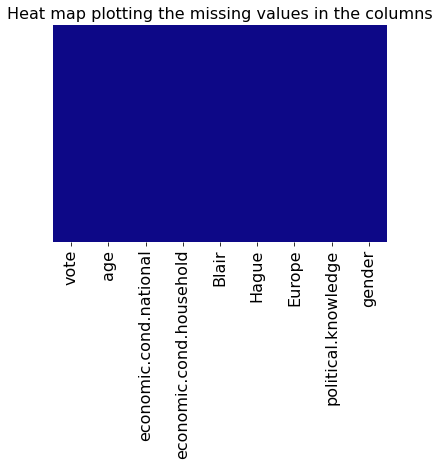

In [6]:
# Checking null values
sns.heatmap(news.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.title("Heat map plotting the missing values in the columns")
plt.show()

In [7]:
# Checking proportion of target
news['vote'].value_counts(1)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [8]:
news['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

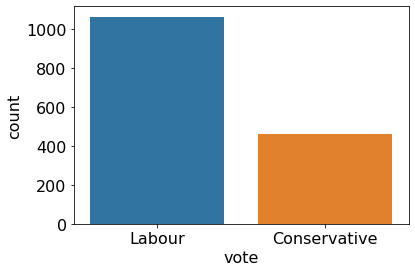

In [9]:
sns.countplot(x = 'vote', data = news)

In [10]:
# Checking 5 point summary and statistics of each column
news.describe(include="all")

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [11]:
# Checking for duplicates
dups = news.duplicated()
dups.sum()

8

In [12]:
# Deleting duplicates
news.drop_duplicates(inplace=True)
news.shape

(1517, 9)

## 1.2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [13]:
# Counts of unique values in each column
for column in news.columns:
    print(column.upper(),': ',news[column].nunique())
    print(news[column].value_counts().sort_values())
    print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


AGE :  70
93     1
90     1
91     1
92     2
87     3
      ..
46    37
35    38
47    38
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




### Univariate Analysis

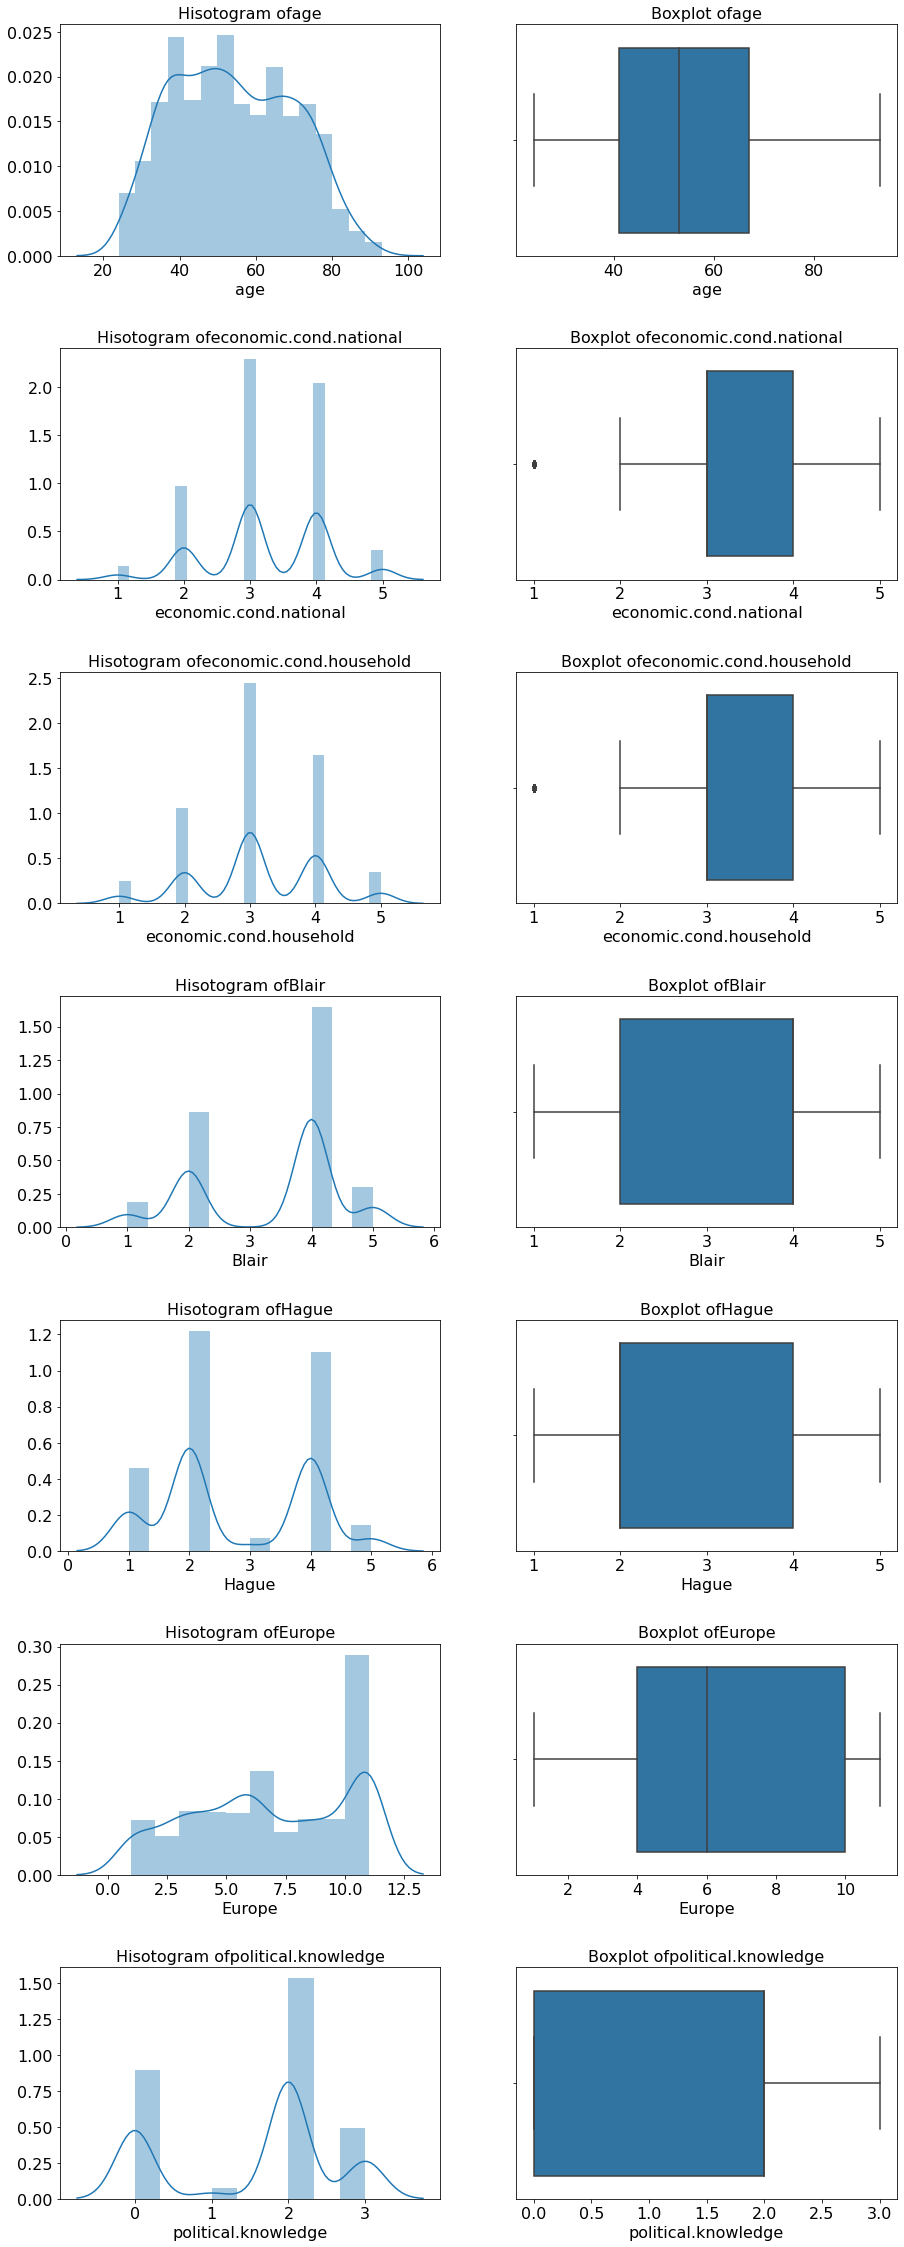

In [14]:
num_col = [] # List of all numerical columns in dataset
for column in news.columns:
    if news[column].dtype != 'object':
        num_col.append(column)
        
fig, axes = plt.subplots(nrows=7,ncols=2,  figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(num_col)):
    sns.distplot(news[num_col[i]], ax=axes[i][0]).set_title("Hisotogram of" + num_col[i])
    sns.boxplot(news[num_col[i]], ax=axes[i][1]).set_title("Boxplot of" + num_col[i])

### Assessment of Party leaders based on the votes

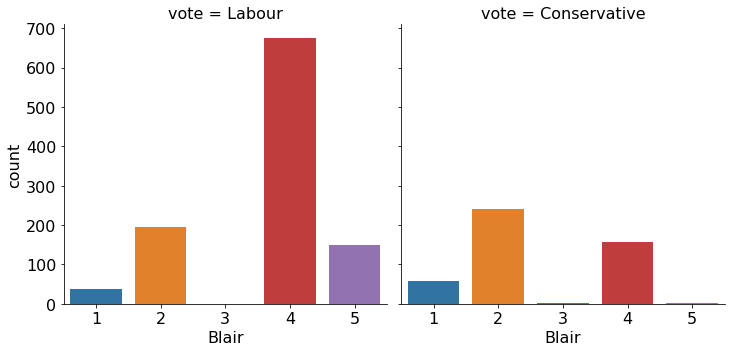

In [15]:
sns.factorplot(x="Blair",col="vote", data=news,kind="count")

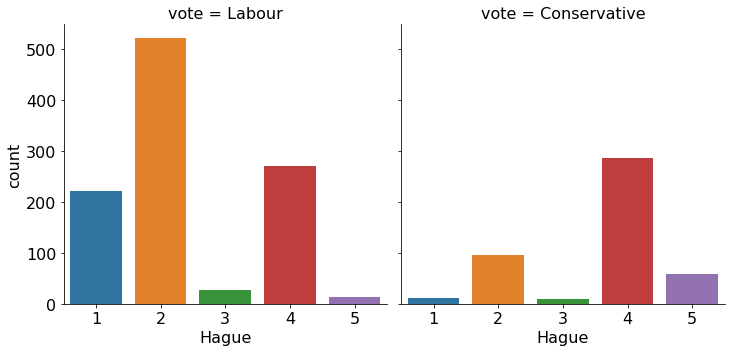

In [16]:
sns.factorplot(x="Hague",col="vote", data=news,kind="count")

### Checking Outliers

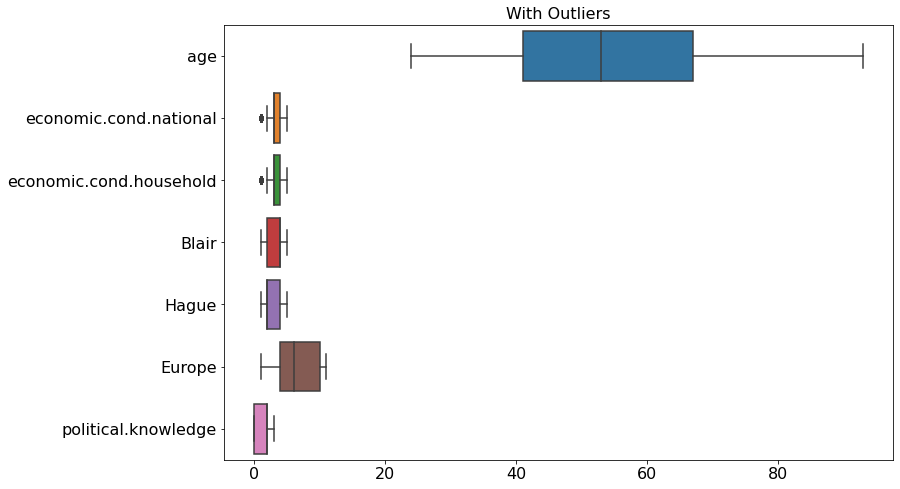

In [17]:
plt.figure(figsize=(12,8))
plt.title('With Outliers',fontsize=16)
sns.boxplot(data= news[num_col], orient="h")

### Bivariate Analysis

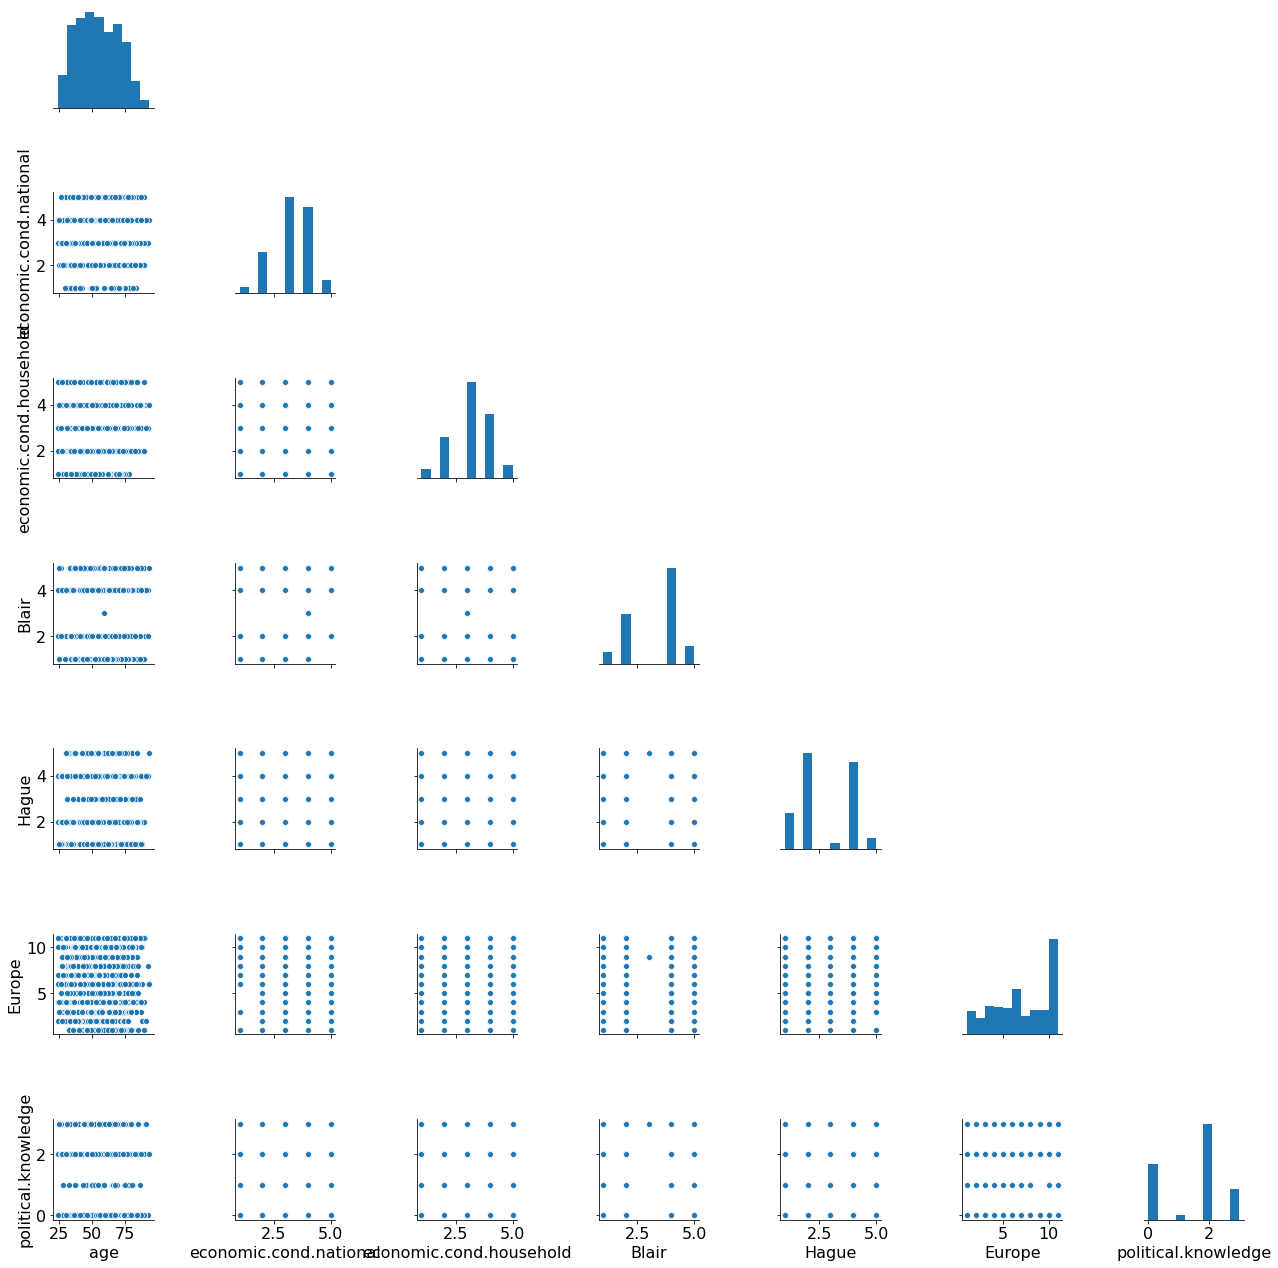

In [18]:
# Pairplot
sns.pairplot(data= news[num_col],corner=True)

Since all the columns are categorical in nature, not much insights can be gathered from pairplot here.

In [19]:
news['vote_code'] = pd.Categorical(news['vote']).codes
news['gender_code'] = pd.Categorical(news['gender']).codes

In [20]:
news['vote_code'].value_counts()

1    1057
0     460
Name: vote_code, dtype: int64

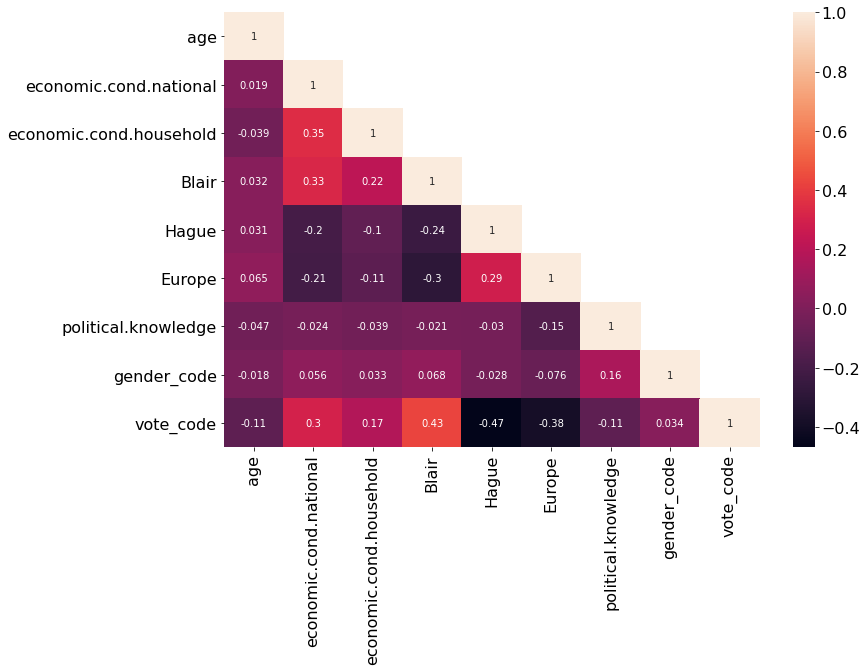

In [21]:
# Pearson Correlation
plt.figure(figsize=(12,8))
sns.heatmap(news[num_col+['gender_code','vote_code']].corr(),annot=True,mask=np.triu(news[num_col+['gender_code','vote_code']].corr(),+1))

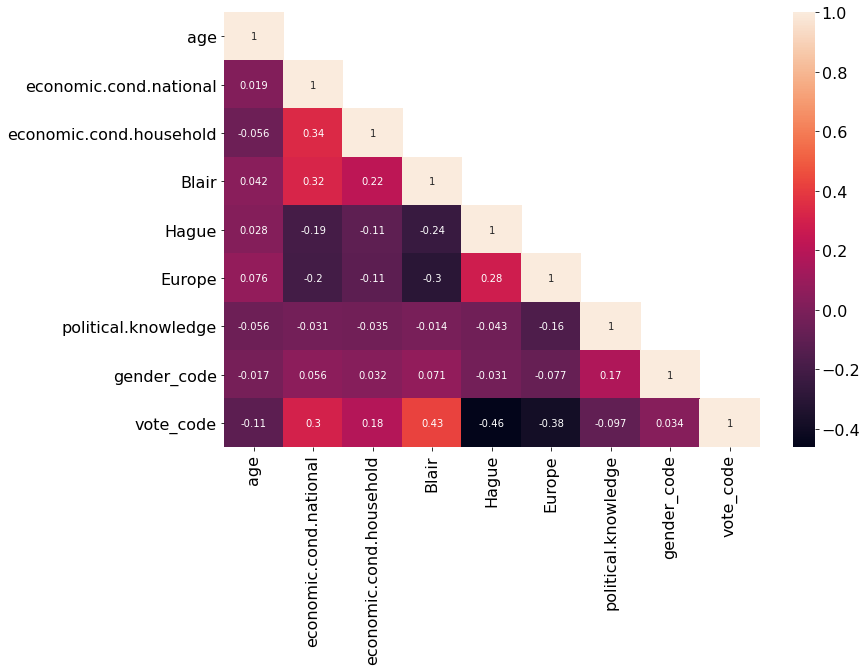

In [22]:
# Spearman Correlation
plt.figure(figsize=(12,8))
sns.heatmap(news[num_col+['gender_code','vote_code']].corr('spearman'),annot=True,mask=np.triu(news[num_col+['gender_code','vote_code']].corr('spearman'),+1))

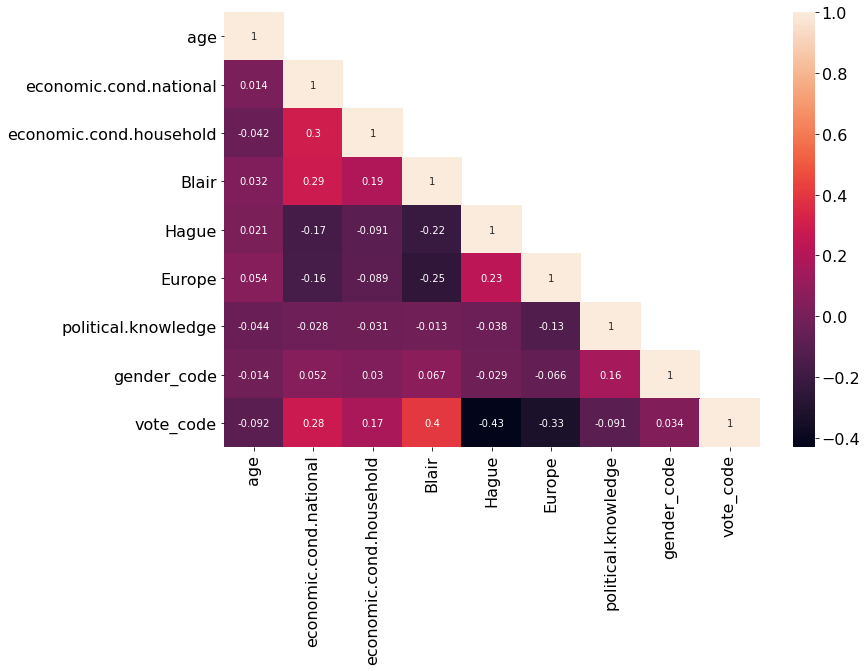

In [23]:
# Kendall Correlation
plt.figure(figsize=(12,8))
sns.heatmap(news[num_col+['gender_code','vote_code']].corr('kendall'),annot=True,mask=np.triu(news[num_col+['gender_code','vote_code']].corr('kendall'),+1))

H0: There is no statistically significant relationship between variable X and variable Y 

H1: There is a statistically significant relationship between variable X and variable Y

p-value < 0.05 : Reject H0

p-value > 0.05 : Fail to Reject H0


In [24]:
from scipy.stats import pearsonr, spearmanr,kendalltau
print("gender: ",spearmanr(news['gender'], news['vote_code']))
print("political.knowledge: ",spearmanr(news['political.knowledge'], news['vote_code']))
print("gender: ",kendalltau(news['gender'], news['vote_code']))
print("political.knowledge: ",kendalltau(news['political.knowledge'], news['vote_code']))

gender:  SpearmanrResult(correlation=0.03446383603945051, pvalue=0.179721470556758)
political.knowledge:  SpearmanrResult(correlation=-0.096521213409195, pvalue=0.00016650310959057758)
gender:  KendalltauResult(correlation=0.034463836039450524, pvalue=0.17963537232140392)
political.knowledge:  KendalltauResult(correlation=-0.09136525805116534, pvalue=0.00017118453936839192)


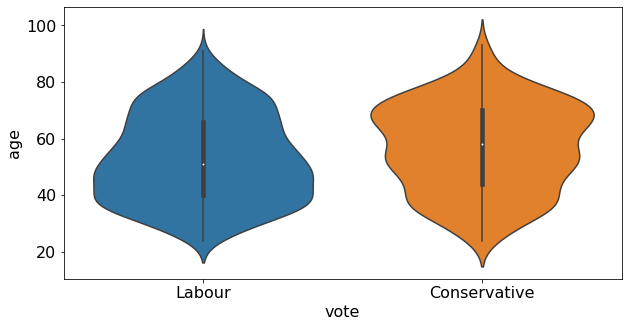

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x=news['vote'], y=news['age'])
plt.show()

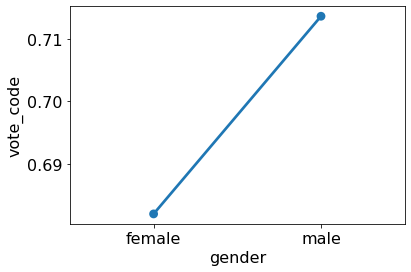

In [26]:
sns.pointplot('gender','vote_code',data=news, ci=None)

In [27]:
news.drop(['vote_code','gender_code'],axis=1,inplace=True)

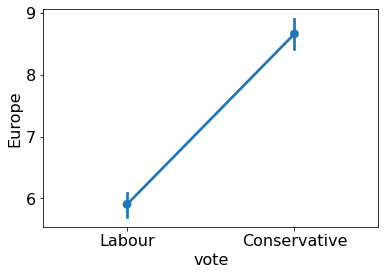

In [28]:
sns.pointplot('vote','Europe',data=news)

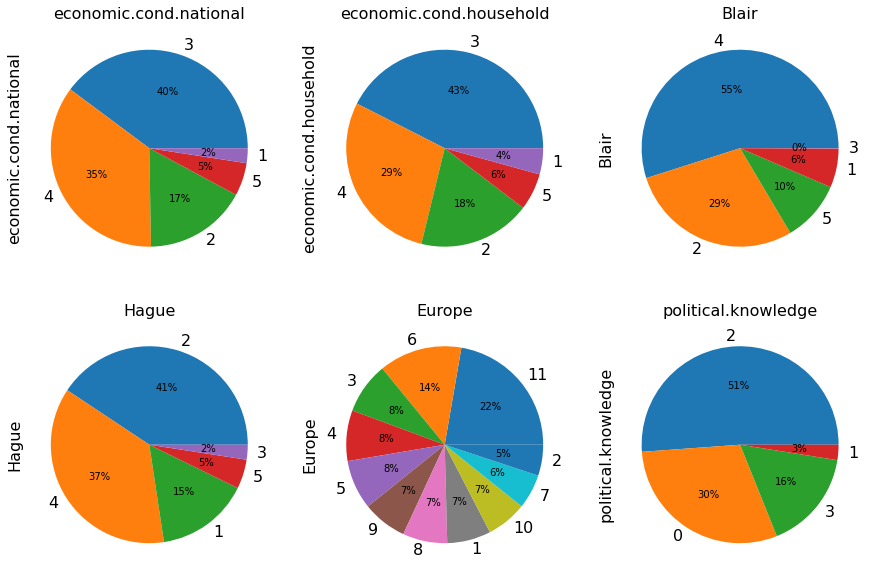

In [29]:
fig=plt.figure(figsize=(15,10))
for i in range(0,len(news.iloc[:,2:8].columns)):
    ax=fig.add_subplot(2,3,i+1).set_title(news.iloc[:,2:8].columns[i])
    news[news.iloc[:,2:8].columns[i]].value_counts().plot(kind='pie', autopct='%1.0f%%')

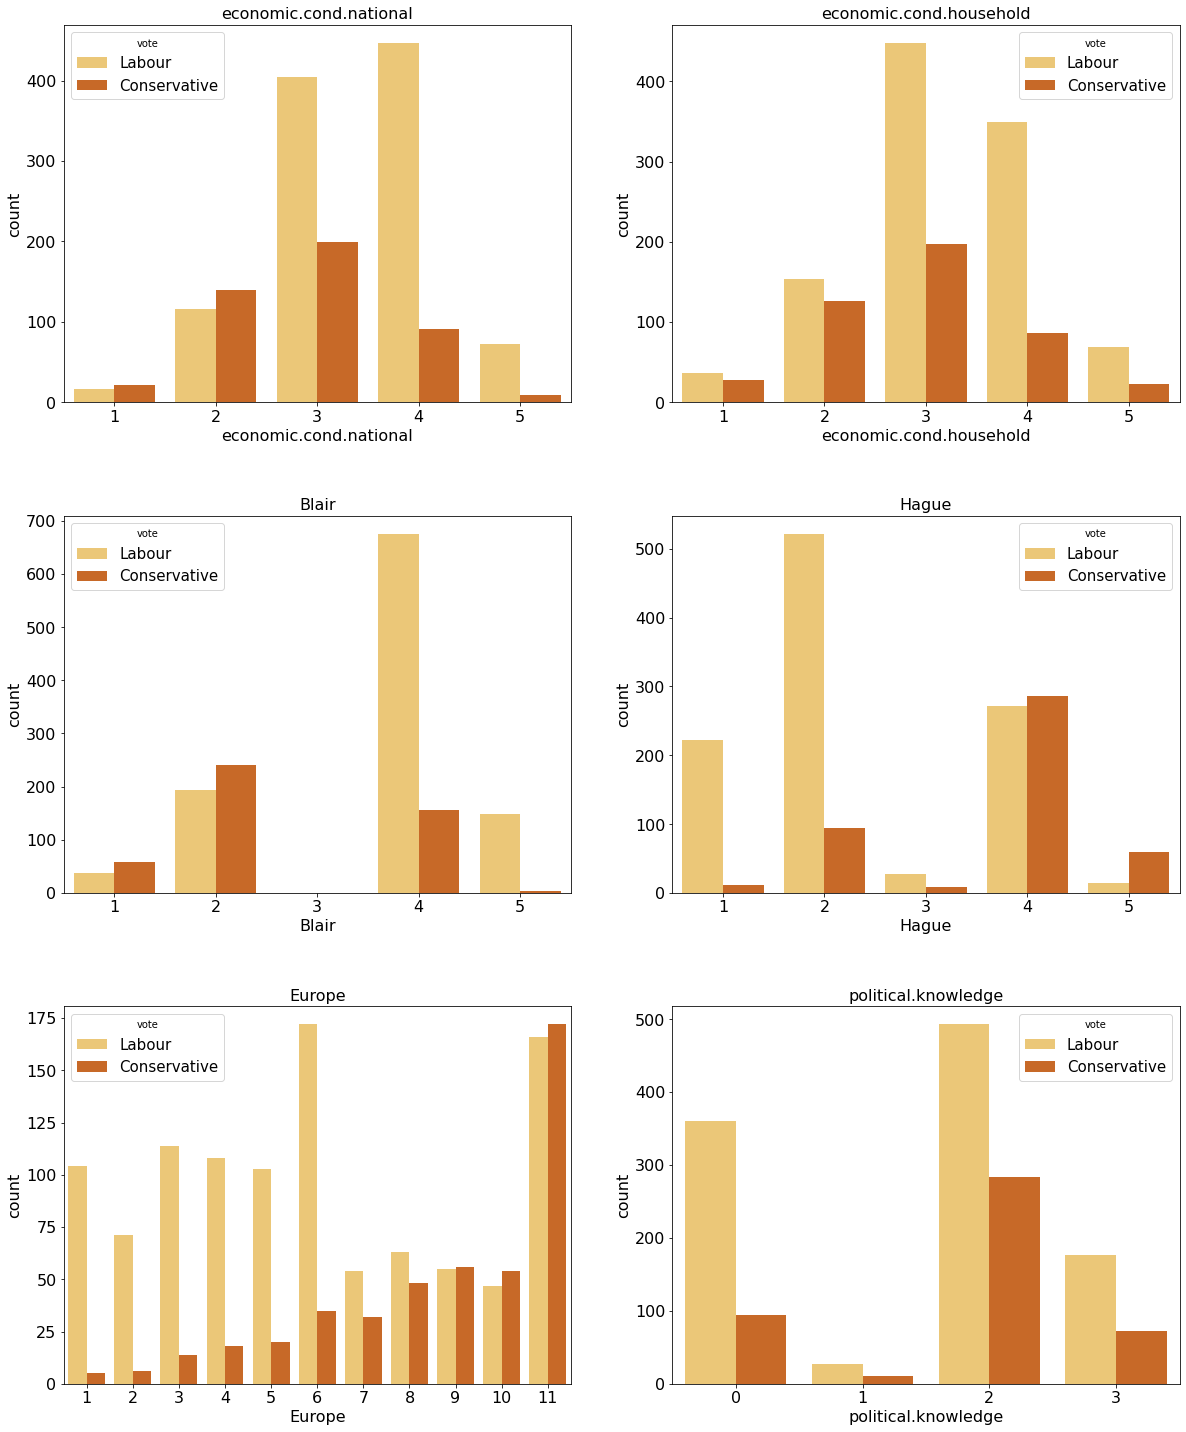

In [30]:
fig=plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace = .3, wspace=.2)
for i in range(0,len(news.iloc[:,2:8].columns)):
    ax=fig.add_subplot(3,2,i+1).set_title(news.iloc[:,2:8].columns[i])
    sns.countplot(news[news.iloc[:,2:8].columns[i]],hue=news['vote'],palette="YlOrBr")

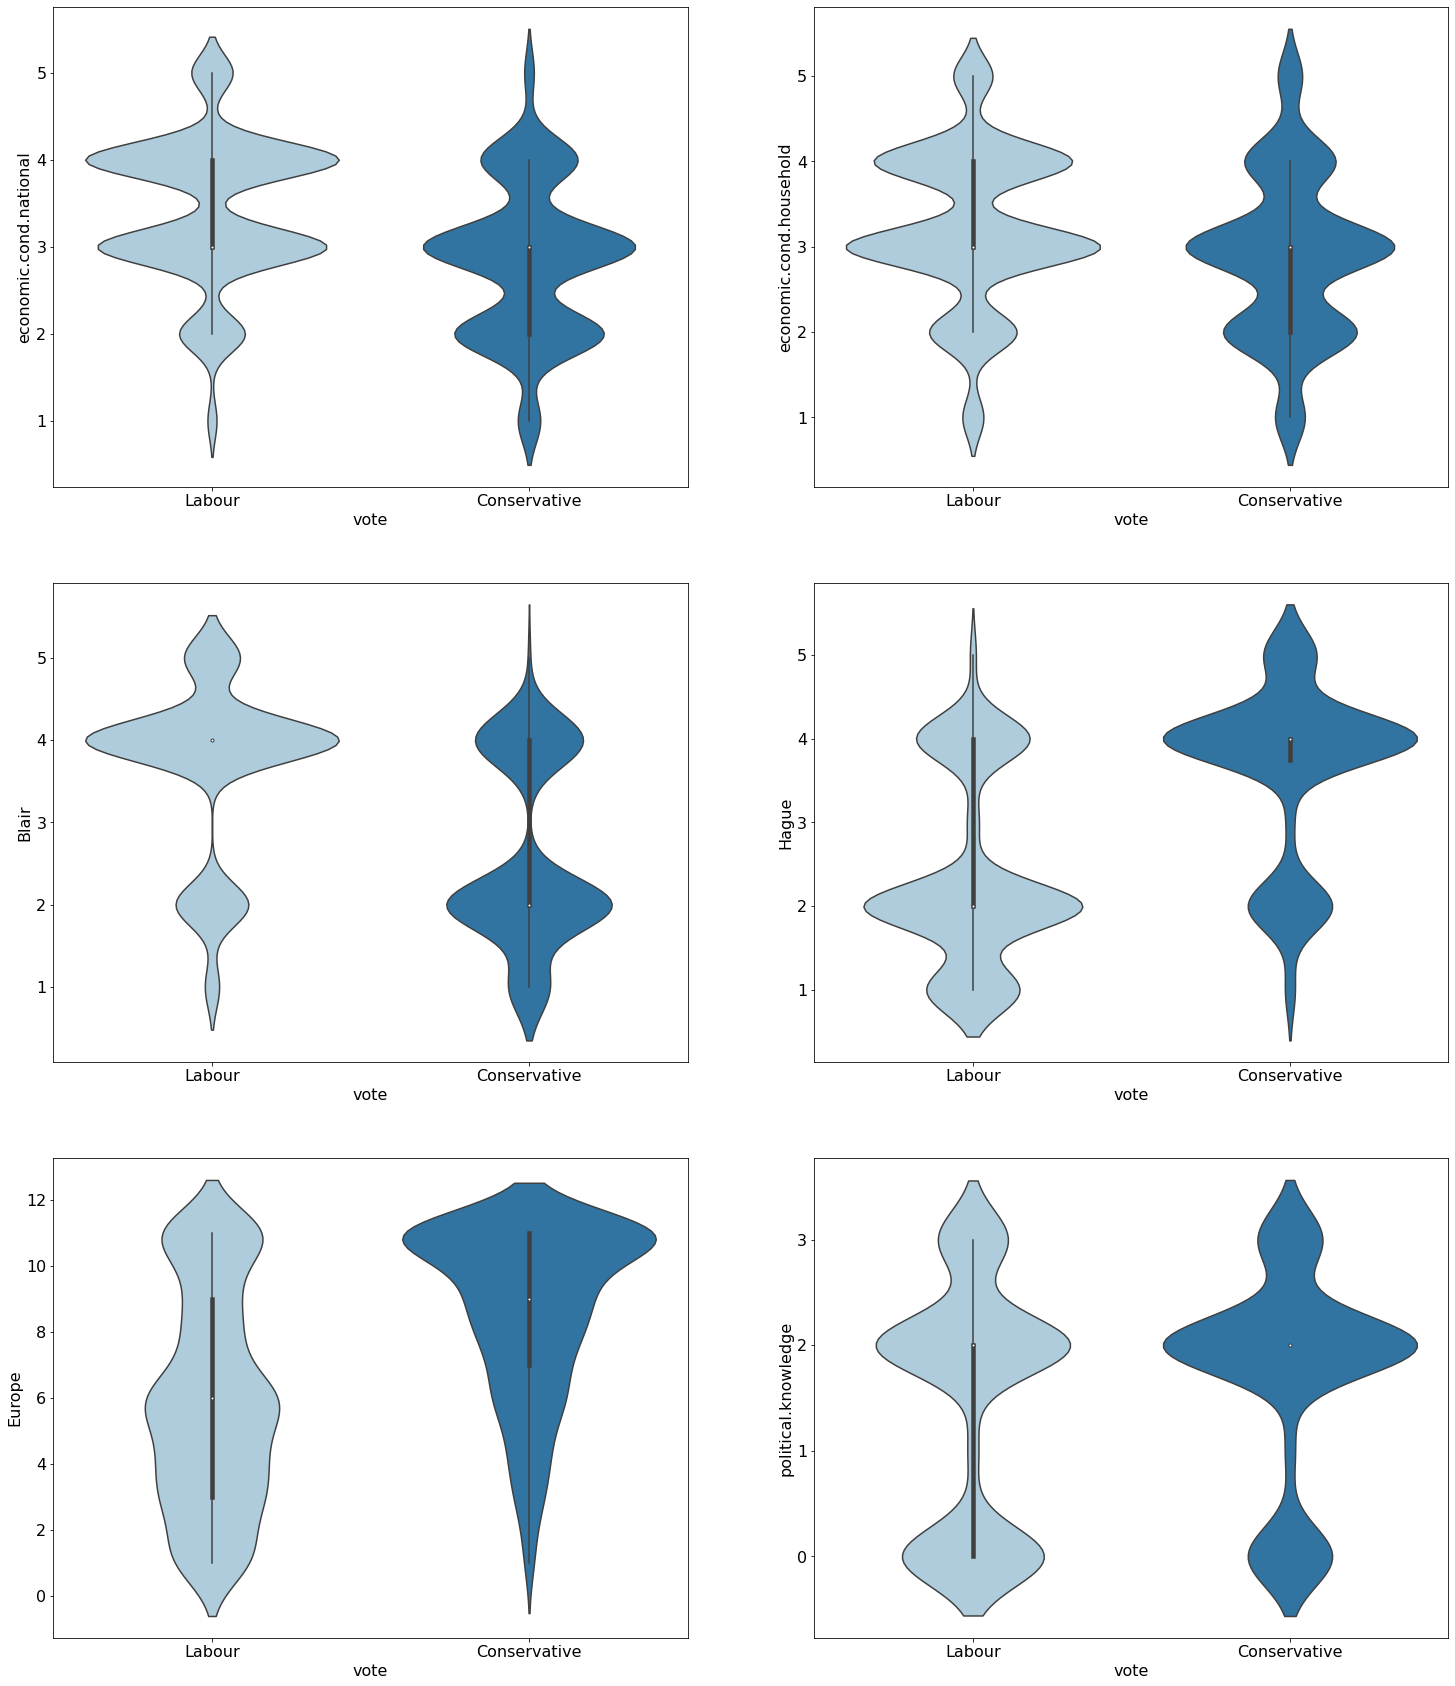

In [31]:
fig=plt.figure(figsize=(25,30))
fig.subplots_adjust(hspace = .2, wspace=.2)
for i in range(0,len(news.iloc[:,2:8].columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.violinplot(x=news['vote'],y = news[news.iloc[:,2:8].columns[i]],palette="Paired")

## 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

### Scaling

The columns economic.cond.national, economic.cond.household, Blair, Hague, and political.knowledge are ordinal in nature and at similar scales. The age column consists of ages between 24 and 93, they can be binned in 5 categories to bring them to similar ordinal scales as others. The column Europe is ordinal and has a scale of 1-11 which can be brought down to scale of 6 bringing it close to other ordinal scales. Hence scaling has been performed by bringing all columns to comparable scales.

In [32]:
# Unique ages
np.sort(news['age'].unique())

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93], dtype=int64)

In [33]:
# Number of Unique ages
news['age'].nunique()

70

Age range : (24,38) = 1, (39, 53) = 2, (54, 68) = 3, (69, 83) = 4, (84, 98) = 5

Europe range: (1 2) = 1, (3 4) = 2, (5 6) = 3, (7 8) = 4, (9 10) = 5, 11 = 6

In [34]:
# Binning of age and Europe column as above assignment
news['age_binned'] = pd.cut(x=news['age'], bins=[23, 38, 53, 68, 83, 98], labels=['1', '2', '3','4','5'])
news['Europe_binned'] = pd.cut(x=news['Europe'], bins=[0, 2, 4, 6, 8, 10, 11], labels=['1', '2', '3','4','5','6'])
news['age_binned'] = news['age_binned'].astype('int64') 
news['Europe_binned'] = news['Europe_binned'].astype('int64')

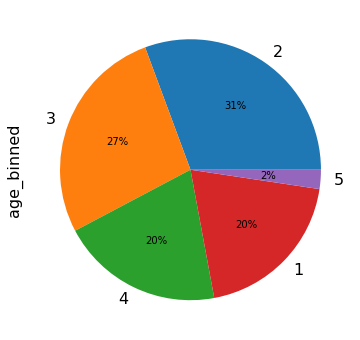

In [35]:
plt.figure(figsize=(8,6))
news['age_binned'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

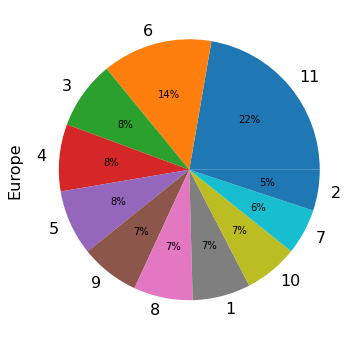

In [36]:
plt.figure(figsize=(8,6))
news['Europe'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

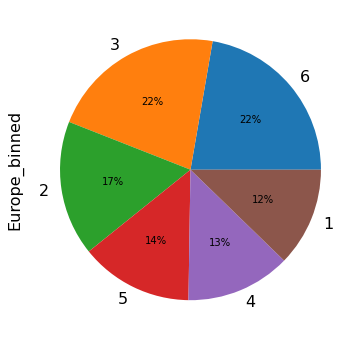

In [37]:
plt.figure(figsize=(8,6))
news['Europe_binned'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [38]:
# New dataframe with binned columns
news_binned = news.copy()
news_binned.drop(['age','Europe'],axis = 1,inplace = True)
news.drop(['age_binned', 'Europe_binned'],axis = 1,inplace = True)

In [39]:
news.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


### Encoding

In [40]:
# Dummy Variable Encoding
news_binned = pd.get_dummies(news_binned, columns=['gender'],drop_first=True)

In [41]:
# Label encoding target variable (Minority = 1)
news_binned.replace({'Labour': 0,'Conservative': 1},inplace=True)

In [42]:
news_binned.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,political.knowledge,age_binned,Europe_binned,gender_male
1,0,3,3,4,1,2,2,1,0
2,0,4,4,4,4,2,1,3,1
3,0,4,4,5,2,2,1,2,1
4,0,4,2,2,1,0,1,2,0
5,0,2,2,1,1,2,2,3,1


### Splitting of Data

In [43]:
# Copy all the predictor variables into X dataframe
X = news_binned.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = news_binned['vote']

In [44]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [45]:
# Checking dimensions on the train and test data
print('x_train: ',X_train.shape)
print('x_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (1061, 8)
x_test:  (456, 8)
y_train:  (1061,)
y_test:  (456,)


## 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis).

### Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [47]:
%%time
# Fit the Logistic Regression model
LR = LogisticRegression(random_state = 1)
LR.fit(X_train, y_train)

Wall time: 17 ms


In [48]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LR.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LR.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.68       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [49]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LR, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(LR, X_test, y_test, cv=10)))

Train set CV scores: 0.8323 

Test set CV scores: 0.8422


**Applying GridSearchCV for Logistic Regression**

Tuning the hyperparameters to improve model performance

In [50]:
# Tuning model hyperparameters
grid={'penalty':['l2','none','l1'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.01,0.001],
      'multi_class':['ovr','multinomial'],
      'C':[0.01,0.001]}

LR_grid = LogisticRegression(max_iter=10000,random_state=1)

grid_search_LR = GridSearchCV(estimator = LR_grid, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [51]:
%%time
# Fit the Logistic Regression model
grid_search_LR.fit(X_train, y_train)

Wall time: 4.45 s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.001],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [52]:
# Best parameters
grid_search_LR.best_params_

{'C': 0.01,
 'multi_class': 'ovr',
 'penalty': 'none',
 'solver': 'lbfgs',
 'tol': 0.01}

In [53]:
# Final Logistic Regression Model after applying gridsearch
best_LR = grid_search_LR.best_estimator_

In [54]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_LR.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_LR.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.68       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [55]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_LR, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_LR, X_test, y_test, cv=10)))

Train set CV scores: 0.8332 

Test set CV scores: 0.8422


In [56]:
# Prediction
LR_train_predict = LR.predict(X_train)
LR_test_predict = LR.predict(X_test)

# Probability Prediction
LR_prob_train = LR.predict_proba(X_train)
LR_prob_test = LR.predict_proba(X_test)

### LDA (linear discriminant analysis) Model

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [58]:
%%time
# Fit the LDA model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

Wall time: 8 ms


In [59]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LDA.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LDA.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.73      0.75       153

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [60]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LDA, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(LDA, X_test, y_test, cv=10)))

Train set CV scores: 0.8276 

Test set CV scores: 0.8399


**Applying GridSearchCV for LDA**

Tuning the hyperparameters to improve model performance

In [61]:
# Tuning model hyperparameters
grid_LDA={"solver" : ['svd', 'lsqr', 'eigen'],
          "tol" : [0.0001,0.0002,0.0003],
          "shrinkage" : ['auto', 'None']}

grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = grid_LDA, cv = 5, n_jobs=-1,scoring='f1')

In [62]:
%%time
# Fit the LDA model
grid_search_LDA.fit(X_train, y_train)

Wall time: 584 ms


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [63]:
# Best parameters
grid_search_LDA.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [64]:
# Final LDA Model after applying gridsearch
best_LDA = grid_search_LDA.best_estimator_

In [65]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_LDA.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_LDA.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.75      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



In [66]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_LDA, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_LDA, X_test, y_test, cv=10)))

Train set CV scores: 0.8304 

Test set CV scores: 0.8377


In [67]:
# Prediction
LDA_train_predict = LDA.predict(X_train)
LDA_test_predict = LDA.predict(X_test)

# Probability Prediction
LDA_prob_train = LDA.predict_proba(X_train)
LDA_prob_test = LDA.predict_proba(X_test)

## 1.5) Apply KNN Model and Naïve Bayes Model. Interpret

### KNN Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
%%time
# Fit the KNN Model
KNN=KNeighborsClassifier() # default k = 5
KNN.fit(X_train,y_train)

Wall time: 6.5 ms


In [70]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, KNN.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, KNN.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.91      0.91       754
           1       0.78      0.75      0.76       307

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89       303
           1       0.81      0.73      0.77       153

    accuracy                           0.85       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.85      0.85       456
 



In [71]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(KNN, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(KNN, X_test, y_test, cv=10)))

Train set CV scores: 0.8181 

Test set CV scores: 0.8067


**Finding optimal K value using Misclassification Error**

In [72]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]

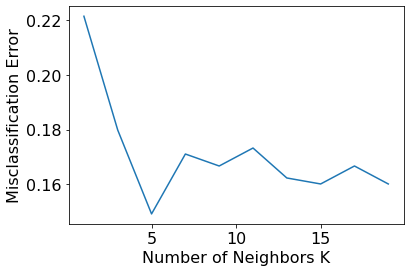

In [73]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The difference between accuracies of train and test set is better for K = 15 than k = 5 even though the performance of train set has reduced. It means this model has converged better and hence it will be preferred. Also the test set performance has slightly increased too.

**Applying GridSearchCV for KNN**

Tuning the hyperparameters to improve model performance

In [74]:
# Tuning model hyperparameters
grid={'n_neighbors':[7,9,15],
    'weights':['uniform', 'distance'],
    'p':[1,2],
    'leaf_size':[100]
     }

grid_search_KNN = GridSearchCV(estimator = KNN, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [75]:
%%time
# Fit the KNN model
grid_search_KNN.fit(X_train, y_train)

Wall time: 869 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [100], 'n_neighbors': [7, 9, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')

In [76]:
# Best parameters
grid_search_KNN.best_params_

{'leaf_size': 100, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [77]:
# Final KNN Model after applying gridsearch
best_KNN = grid_search_KNN.best_estimator_

In [78]:
# Prediction
KNN_train_predict = best_KNN.predict(X_train)
KNN_test_predict = best_KNN.predict(X_test)

# Probability Prediction
KNN_prob_train = best_KNN.predict_proba(X_train)
KNN_prob_test = best_KNN.predict_proba(X_test)

In [79]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, KNN_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, KNN_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       754
           1       0.78      0.69      0.73       307

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.90      0.88       303
           1       0.79      0.70      0.74       153

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 



In [80]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_LDA, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_LDA, X_test, y_test, cv=10)))

Train set CV scores: 0.8304 

Test set CV scores: 0.8377


### Naïve Bayes Model

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
%%time
# Fit the Naïve Bayes Model
NB = GaussianNB()
NB.fit(X_train, y_train)

Wall time: 4 ms


In [83]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, NB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, NB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.74      0.68      0.71       307

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.86      0.87       303
           1       0.73      0.75      0.74       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



In [84]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(NB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(NB, X_test, y_test, cv=10)))

Train set CV scores: 0.8332 

Test set CV scores: 0.8224


**Applying GridSearchCV for Naïve Bayes**

Tuning the hyperparameters to improve model performance

In [85]:
# Tuning model hyperparameters
grid={'var_smoothing':[1e-09,1e-07]
     }

grid_search_NB = GridSearchCV(estimator = NB, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [86]:
%%time
# Fit the Naïve Bayes model
grid_search_NB.fit(X_train, y_train)

Wall time: 85.1 ms


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-07]}, scoring='f1')

In [87]:
# Best parameters
grid_search_NB.best_params_

{'var_smoothing': 1e-09}

In [88]:
# Final Naïve Bayes after applying gridsearch
best_NB = grid_search_LR.best_estimator_

In [89]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_NB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_NB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.68       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [90]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_NB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_NB, X_test, y_test, cv=10)))

Train set CV scores: 0.8332 

Test set CV scores: 0.8422


In [91]:
# Prediction
NB_train_predict = NB.predict(X_train)
NB_test_predict = NB.predict(X_test)

# Probability Prediction
NB_prob_train = NB.predict_proba(X_train)
NB_prob_test = NB.predict_proba(X_test)

## 1.6) Model Tuning, Bagging and Boosting.

### Decision Tree

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
%%time
# Fit the Decision Tree Model
DT = DecisionTreeClassifier(random_state = 1)
DT.fit(X_train, y_train)

Wall time: 9.51 ms


In [94]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       754
           1       1.00      0.95      0.97       307

    accuracy                           0.99      1061
   macro avg       0.99      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.83      0.86      0.85       303
           1       0.70      0.65      0.68       153

    accuracy                           0.79       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.79      0.79      0.79       456
 



In [95]:
# Mean 10 fold cross validation scores for train and test set (Decision Tree)
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(DT, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(DT, X_test, y_test, cv=10)))

Train set CV scores: 0.7719 

Test set CV scores: 0.7238


#### Applying GridSearchCV for Decision Tree

In [96]:
# Tuning model hyperparameters
grid = {'max_features' : [2,3,4],
        'min_samples_leaf' : [10,20,30], # 1-3% of total dataset
        'min_samples_split' : [30,40,50], # approx 3 times the min_samples_leaf
    }

grid_search_DT = GridSearchCV(DT, param_grid = grid, cv = 5, verbose=False, n_jobs=-1)

In [97]:
%%time
# Fit the Decision Tree model
grid_search_DT.fit(X_train, y_train) 

Wall time: 958 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_features': [2, 3, 4],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [30, 40, 50]},
             verbose=False)

In [98]:
# Best parameters
grid_search_DT.best_params_

{'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [99]:
# Final Decision Tree Model after applying gridsearch
best_DT = grid_search_DT.best_estimator_

In [100]:
# Prediction
DT_train_predict = best_DT.predict(X_train)
DT_test_predict = best_DT.predict(X_test)

# Probability Prediction
DT_prob_train = best_DT.predict_proba(X_train)
DT_prob_test = best_DT.predict_proba(X_test)

In [101]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.74      0.71      0.72       307

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.75      0.69      0.72       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456
 



In [102]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_DT, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_DT, X_test, y_test, cv=10)))

Train set CV scores: 0.8237 

Test set CV scores: 0.7716


### Bagging

In [103]:
%%time
# Fit the Bagging Model
BAG = BaggingClassifier(base_estimator = best_DT, random_state = 1)
BAG.fit(X_train, y_train)

Wall time: 47.5 ms


In [104]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, BAG.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, BAG.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.92      0.90       754
           1       0.78      0.67      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.83      0.91      0.87       303
           1       0.78      0.63      0.70       153

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456
 



In [105]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(BAG, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(BAG, X_test, y_test, cv=10)))

Train set CV scores: 0.8209 

Test set CV scores: 0.8026


**Applying GridSearchCV for Bagging using tuned Decision Tree**

Tuning the hyperparameters to improve model performance

In [106]:
# Tuning model hyperparameters
grid={'n_estimators':[50,55,60],
      'max_features':[5,6,7]
     }

grid_search_BAG = GridSearchCV(estimator = BAG, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [107]:
%%time
# Fit the Bagging model
grid_search_BAG.fit(X_train, y_train)

Wall time: 4.58 s


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=3,
                                                                               min_samples_leaf=10,
                                                                               min_samples_split=30,
                                                                               random_state=1),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [5, 6, 7],
                         'n_estimators': [50, 55, 60]},
             scoring='f1')

In [108]:
# Best parameters
grid_search_BAG.best_params_

{'max_features': 7, 'n_estimators': 50}

In [109]:
# Final Bagging Model after applying gridsearch
best_BAG = grid_search_BAG.best_estimator_

In [110]:
# Prediction
BAG_train_predict = best_BAG.predict(X_train)
BAG_test_predict = best_BAG.predict(X_test)

# Probability Prediction
BAG_prob_train = best_BAG.predict_proba(X_train)
BAG_prob_test = best_BAG.predict_proba(X_test)

In [111]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, BAG_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, BAG_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.94      0.91       754
           1       0.82      0.67      0.74       307

    accuracy                           0.86      1061
   macro avg       0.85      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.84      0.92      0.88       303
           1       0.81      0.66      0.73       153

    accuracy                           0.83       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



In [112]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_BAG, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_BAG, X_test, y_test, cv=10)))

Train set CV scores: 0.8341 

Test set CV scores: 0.8200


### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
%%time
# Fit the Random Forest Model
RF = RandomForestClassifier(random_state = 1)
RF.fit(X_train, y_train)

Wall time: 378 ms


In [115]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       754
           1       0.98      0.97      0.98       307

    accuracy                           0.99      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.89       303
           1       0.81      0.71      0.76       153

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.84      0.85      0.84       456
 



In [116]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(RF, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(RF, X_test, y_test, cv=10)))

Train set CV scores: 0.8087 

Test set CV scores: 0.7872


#### Applying GridSearchCV for Random Forest

In [117]:
# Tuning model hyperparameters
grid = {'n_estimators': [100,300],
        'max_features' : [4,5],
        'min_samples_leaf' : [2,3], # 1-3% of length of dataset
        'min_samples_split' : [5,6,7] # approx 3 times the min_samples_leaf
    }

grid_search_RF = GridSearchCV(RF, param_grid = grid, cv = 5, verbose=False, n_jobs=-1)

In [118]:
%%time
# Fit the Random Forest model
grid_search_RF.fit(X_train, y_train) 

Wall time: 28.7 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_features': [4, 5], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [100, 300]},
             verbose=False)

In [119]:
# Best parameters
grid_search_RF.best_params_

{'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [120]:
# Final Random Forest Model after applying gridsearch
best_RF = grid_search_RF.best_estimator_

In [121]:
# Prediction
RF_train_predict = best_RF.predict(X_train)
RF_test_predict = best_RF.predict(X_test)

# Probability Prediction
RF_prob_train = best_RF.predict_proba(X_train)
RF_prob_test = best_RF.predict_proba(X_test)

In [122]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       303
           1       0.79      0.71      0.75       153

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456
 



In [123]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_RF, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_RF, X_test, y_test, cv=10)))

Train set CV scores: 0.8369 

Test set CV scores: 0.8004


### Boosting
### 1. Adaptive Boosting

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
%%time
# Fit the Adaptive Boosting model
ADB = AdaBoostClassifier(random_state=1)
ADB.fit(X_train,y_train)

Wall time: 142 ms


In [126]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, ADB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, ADB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89       754
           1       0.74      0.67      0.71       307

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.74      0.68      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



In [127]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(ADB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(ADB, X_test, y_test, cv=10)))

Train set CV scores: 0.8351 

Test set CV scores: 0.7831


**Applying GridSearchCV for Adaptive Boosting**

Tuning the hyperparameters to improve model performance

In [128]:
# Tuning model hyperparameters
grid={'n_estimators':[30,40,50],
      'learning_rate':[0.001,0.000001]
     }

grid_search_ADB = GridSearchCV(estimator = ADB, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [129]:
%%time
# Fit the Adaptive Boosting model
grid_search_ADB.fit(X_train, y_train)

Wall time: 1.56 s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 1e-06],
                         'n_estimators': [30, 40, 50]},
             scoring='f1')

In [130]:
# Best parameters
grid_search_ADB.best_params_

{'learning_rate': 0.001, 'n_estimators': 30}

In [131]:
# Final Adaptive Boosting Model after applying gridsearch
best_ADB = grid_search_ADB.best_estimator_

In [132]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_ADB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_ADB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.73      0.80       754
           1       0.53      0.75      0.62       307

    accuracy                           0.74      1061
   macro avg       0.70      0.74      0.71      1061
weighted avg       0.78      0.74      0.75      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.73      0.79       303
           1       0.59      0.76      0.66       153

    accuracy                           0.74       456
   macro avg       0.72      0.74      0.72       456
weighted avg       0.77      0.74      0.75       456
 



In [133]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_ADB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_ADB, X_test, y_test, cv=10)))

Train set CV scores: 0.7342 

Test set CV scores: 0.7218


In [134]:
# Prediction
ADB_train_predict = ADB.predict(X_train)
ADB_test_predict = ADB.predict(X_test)

# Probability Prediction
ADB_prob_train = ADB.predict_proba(X_train)
ADB_prob_test = ADB.predict_proba(X_test)

### 2. Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
%%time
# Fit the Gradient Boosting model
GB = GradientBoostingClassifier(random_state=1)
GB.fit(X_train, y_train)

Wall time: 156 ms


In [137]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, GB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, GB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.93      0.92       754
           1       0.82      0.75      0.78       307

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       303
           1       0.79      0.71      0.75       153

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456
 



In [138]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(GB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(GB, X_test, y_test, cv=10)))

Train set CV scores: 0.8369 

Test set CV scores: 0.7938


**Applying GridSearchCV for Gradient Boosting**

Tuning the hyperparameters to improve model performance

In [139]:
# Tuning model hyperparameters
grid={'n_estimators':[300,500],
      'learning_rate':[0.01,0.0001],
      'max_depth':[1,3,5],
      'min_samples_leaf':[3,5],
      'min_samples_split':[10,15,30],
      'max_features':[3,4,5]
     }

grid_search_GB = GridSearchCV(estimator = GB, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [140]:
%%time
# Fit the Gradient Boosting model
grid_search_GB.fit(X_train, y_train)

Wall time: 4min 9s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.0001],
                         'max_depth': [1, 3, 5], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [10, 15, 30],
                         'n_estimators': [300, 500]},
             scoring='f1')

In [141]:
# Best parameters
grid_search_GB.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 500}

In [142]:
# Final Gradient Boosting Model after applying gridsearch
best_GB = grid_search_GB.best_estimator_

In [143]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_GB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_GB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.91       754
           1       0.82      0.72      0.77       307

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.90      0.88       303
           1       0.78      0.71      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



In [144]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_GB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_GB, X_test, y_test, cv=10)))

Train set CV scores: 0.8473 

Test set CV scores: 0.8114


In [145]:
# Prediction
GB_train_predict = GB.predict(X_train)
GB_test_predict = GB.predict(X_test)

# Probability Prediction
GB_prob_train = GB.predict_proba(X_train)
GB_prob_test = GB.predict_proba(X_test)

### 3. Extreme Gradient Boosting

In [146]:
import xgboost as xgb

In [147]:
%%time
# Fit the Extreme Gradient Boosting model
XGB=xgb.XGBClassifier(random_state=1)
XGB.fit(X_train, y_train)

Wall time: 93.6 ms


In [148]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, XGB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, XGB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       754
           1       0.96      0.92      0.94       307

    accuracy                           0.97      1061
   macro avg       0.96      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.85      0.89      0.87       303
           1       0.77      0.69      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456
 



In [149]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(XGB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(XGB, X_test, y_test, cv=10)))

Train set CV scores: 0.8011 

Test set CV scores: 0.7829


**Applying GridSearchCV for Extreme Gradient Boosting**

Tuning the hyperparameters to improve model performance

In [150]:
# Tuning model hyperparameters
grid={'learning_rate':[0.1,0.01],
      'max_depth':[3,4,5],
      'subsample':[0.4,0.6,0.8],
      'gamma':[0.4,0.5, 0.6,0.7],
      'colsample_bytree': [0.6,0.8,1.0]
     }

grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = grid, cv = 5, n_jobs=-1,scoring='f1')

In [151]:
%%time
# Fit the Extreme Gradient Boosting model
grid_search_XGB.fit(X_train, y_train)

Wall time: 34.7 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=1,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [152]:
# Best parameters
grid_search_XGB.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'subsample': 0.4}

In [153]:
# Final Extreme Gradient Boosting Model after applying gridsearch
best_XGB = grid_search_XGB.best_estimator_

In [154]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_XGB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_XGB.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.93      0.91       754
           1       0.81      0.75      0.78       307

    accuracy                           0.88      1061
   macro avg       0.85      0.84      0.85      1061
weighted avg       0.87      0.88      0.88      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.71      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [155]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(best_XGB, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(best_XGB, X_test, y_test, cv=10)))

Train set CV scores: 0.8350 

Test set CV scores: 0.8026


#### Applying RandomSearchCV for Extreme Gradient Boosting

In [156]:
from sklearn.model_selection import RandomizedSearchCV

XGB_param_random = [    
    {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
     'max_depth' : [int(x) for x in np.linspace(1, 32, 32, endpoint=True)],
     'subsample': np.linspace(start = 0.00001, stop = 0.9, num = 20),
      'gamma': np.linspace(start = 0.00001, stop = 0.9, num = 20),
      'colsample_bytree': [0.2,0.4,0.6,0.8,1.0],
    }
]

XGB_random = RandomizedSearchCV(XGB, param_distributions = XGB_param_random, cv = 5, n_jobs=-1)

In [157]:
np.linspace(start = 0.00001, stop = 0.9, num = 20)

array([1.00000000e-05, 4.73778947e-02, 9.47457895e-02, 1.42113684e-01,
       1.89481579e-01, 2.36849474e-01, 2.84217368e-01, 3.31585263e-01,
       3.78953158e-01, 4.26321053e-01, 4.73688947e-01, 5.21056842e-01,
       5.68424737e-01, 6.15792632e-01, 6.63160526e-01, 7.10528421e-01,
       7.57896316e-01, 8.05264211e-01, 8.52632105e-01, 9.00000000e-01])

In [158]:
XGB_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                                          1000, 1200, 1400,
                                                          16

In [159]:
XGB_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2,
              gamma=0.18948157894736845, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.33158526315789477,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, XGB_random.best_estimator_.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, XGB_random.best_estimator_.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       754
           1       0.77      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.83      0.90      0.87       303
           1       0.77      0.64      0.70       153

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456
 



In [161]:
# Mean 10 fold cross validation scores for train and test set
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(XGB_random, X_train, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(XGB_random, X_test, y_test, cv=10)))

Train set CV scores: 0.8313 

Test set CV scores: 0.8029


In [162]:
# Prediction
XGB_train_predict = XGB_random.predict(X_train)
XGB_test_predict = XGB_random.predict(X_test)

# Probability Prediction
XGB_prob_train = XGB_random.predict_proba(X_train)
XGB_prob_test = XGB_random.predict_proba(X_test)

## 1.7) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [163]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [164]:
# Creating a function to create confusion matrix for train and test set
def confusion_matrix(model):
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,5))
    plot_confusion_matrix(model,X_train,y_train,ax=a[0][0],cmap='Greys',display_labels=['Labour','Conservative']);
    a[0][0].set_title('Training Data')

    plot_confusion_matrix(model,X_test,y_test,ax=a[0][1],cmap='Greys',display_labels=['Labour','Conservative']);
    a[0][1].set_title('Test Data');
    plt.tight_layout()  
    plt.show()

### Logistic Regression

**Classification report for train and test set**

In [165]:
# Classification report in a dataframe
LR_df_train=pd.DataFrame(classification_report(y_train, LR_train_predict,output_dict=True)).transpose()
LR_df_test=pd.DataFrame(classification_report(y_test, LR_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

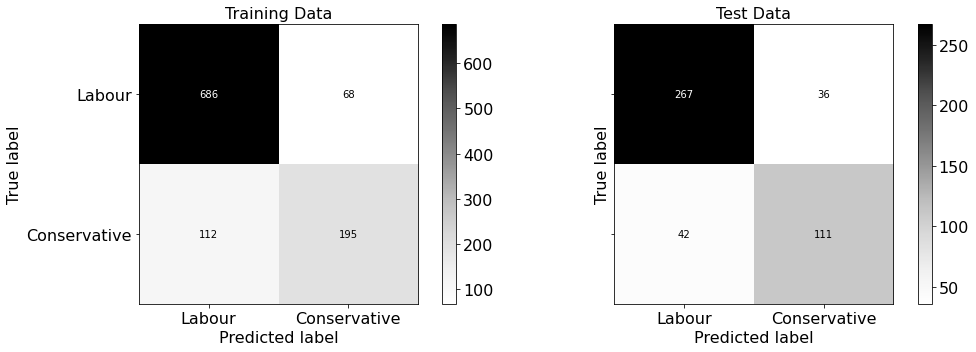

In [166]:
# Plotting confusion matrix for training and test data
confusion_matrix(LR)

**AUC and ROC curve for train and test set**

AUC for the Training Data: 0.889
AUC for the Test Data: 0.883


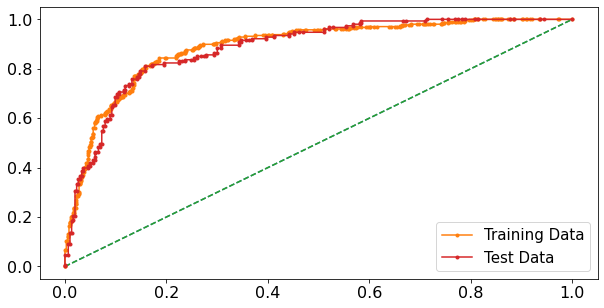

In [167]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
LR_train_auc = metrics.roc_auc_score(y_train,LR_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LR_train_auc)

#  calculate roc curve
LR_train_fpr, LR_train_tpr, thresholds = metrics.roc_curve(y_train,LR_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
LR_test_auc = metrics.roc_auc_score(y_test,LR_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LR_test_auc)

#  calculate roc curve
LR_test_fpr, LR_test_tpr, thresholds = metrics.roc_curve(y_test,LR_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA

**Classification report for train and test set**

In [168]:
# Classification report in a dataframe
LDA_df_train=pd.DataFrame(classification_report(y_train, LDA_train_predict,output_dict=True)).transpose()
LDA_df_test=pd.DataFrame(classification_report(y_test, LDA_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

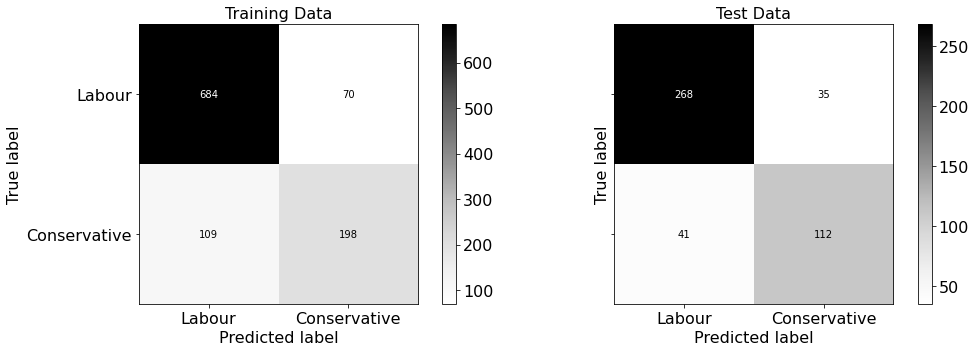

In [169]:
# Plotting confusion matrix for training and test data
confusion_matrix(LDA)

**AUC and ROC curve for train and test set**

AUC for the Training Data: 0.888
AUC for the Test Data: 0.887


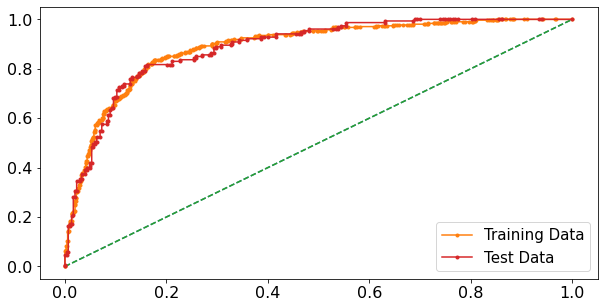

In [170]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(y_train,LDA_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_train_fpr, LDA_train_tpr, thresholds = metrics.roc_curve(y_train,LDA_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(y_test,LDA_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_test_fpr, LDA_test_tpr, thresholds = metrics.roc_curve(y_test,LDA_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### KNN 

**Classification report for train and test set**

In [171]:
# Classification report in a dataframe
KNN_df_train=pd.DataFrame(classification_report(y_train, KNN_train_predict,output_dict=True)).transpose()
KNN_df_test=pd.DataFrame(classification_report(y_test, KNN_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

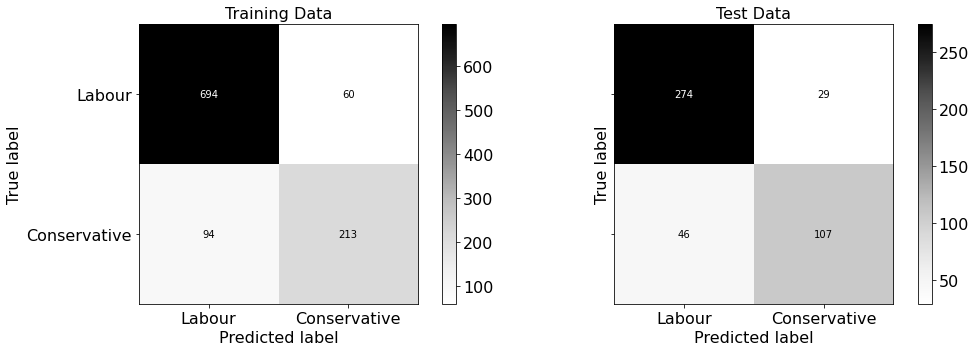

In [172]:
# Plotting confusion matrix for training and test data
confusion_matrix(best_KNN)

**AUC and ROC curve for train and test set**

AUC for the Training Data: 0.921
AUC for the Test Data: 0.890


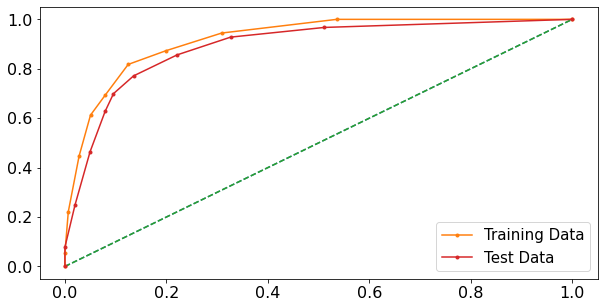

In [173]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
KNN_train_auc = metrics.roc_auc_score(y_train,KNN_prob_train[:,1])
print('AUC for the Training Data: %.3f' % KNN_train_auc)

#  calculate roc curve
KNN_train_fpr, KNN_train_tpr, thresholds = metrics.roc_curve(y_train,KNN_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
KNN_test_auc = metrics.roc_auc_score(y_test,KNN_prob_test[:,1])
print('AUC for the Test Data: %.3f' % KNN_test_auc)

#  calculate roc curve
KNN_test_fpr, KNN_test_tpr, thresholds = metrics.roc_curve(y_test,KNN_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Naïve Bayes
**Classification report for train and test set**

In [174]:
# Classification report in a dataframe
NB_df_train=pd.DataFrame(classification_report(y_train, NB_train_predict,output_dict=True)).transpose()
NB_df_test=pd.DataFrame(classification_report(y_test, NB_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

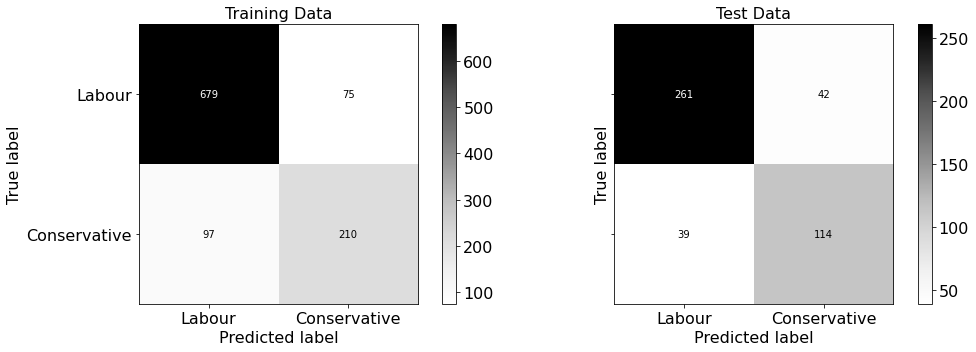

In [175]:
# Plotting confusion matrix for training and test data
confusion_matrix(NB)

AUC for the Training Data: 0.887
AUC for the Test Data: 0.877


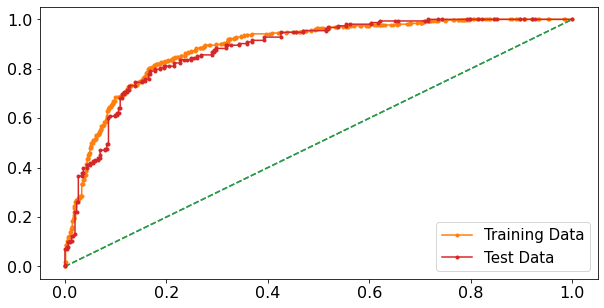

In [176]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
NB_train_auc = metrics.roc_auc_score(y_train,NB_prob_train[:,1])
print('AUC for the Training Data: %.3f' % NB_train_auc)

#  calculate roc curve
NB_train_fpr, NB_train_tpr, thresholds = metrics.roc_curve(y_train,NB_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
NB_test_auc = metrics.roc_auc_score(y_test,NB_prob_test[:,1])
print('AUC for the Test Data: %.3f' % NB_test_auc)

#  calculate roc curve
NB_test_fpr, NB_test_tpr, thresholds = metrics.roc_curve(y_test,NB_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Decision Tree 
**Classification report for train and test set**

In [177]:
# Classification report in a dataframe
DT_df_train=pd.DataFrame(classification_report(y_train, DT_train_predict,output_dict=True)).transpose()
DT_df_test=pd.DataFrame(classification_report(y_test, DT_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

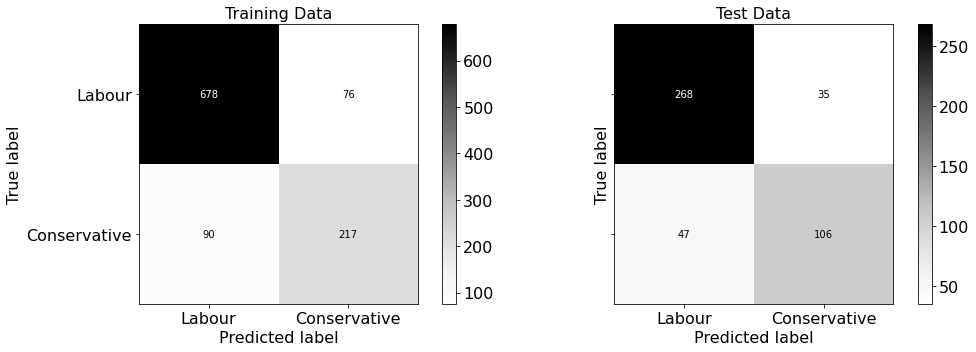

In [178]:
# Plotting confusion matrix for training and test data
confusion_matrix(best_DT)

AUC for the Training Data: 0.908
AUC for the Test Data: 0.855


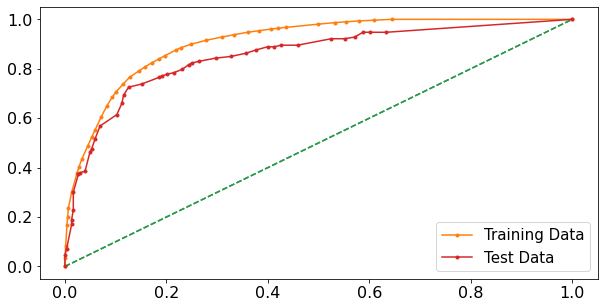

In [179]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
DT_train_auc = metrics.roc_auc_score(y_train,DT_prob_train[:,1])
print('AUC for the Training Data: %.3f' % DT_train_auc)

#  calculate roc curve
DT_train_fpr, DT_train_tpr, thresholds = metrics.roc_curve(y_train,DT_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_train_fpr, DT_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
DT_test_auc = metrics.roc_auc_score(y_test,DT_prob_test[:,1])
print('AUC for the Test Data: %.3f' % DT_test_auc)

#  calculate roc curve
DT_test_fpr, DT_test_tpr, thresholds = metrics.roc_curve(y_test,DT_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_test_fpr, DT_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Random Forest
**Classification report for train and test set**

In [180]:
# Classification report in a dataframe
RF_df_train=pd.DataFrame(classification_report(y_train, RF_train_predict,output_dict=True)).transpose()
RF_df_test=pd.DataFrame(classification_report(y_test, RF_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

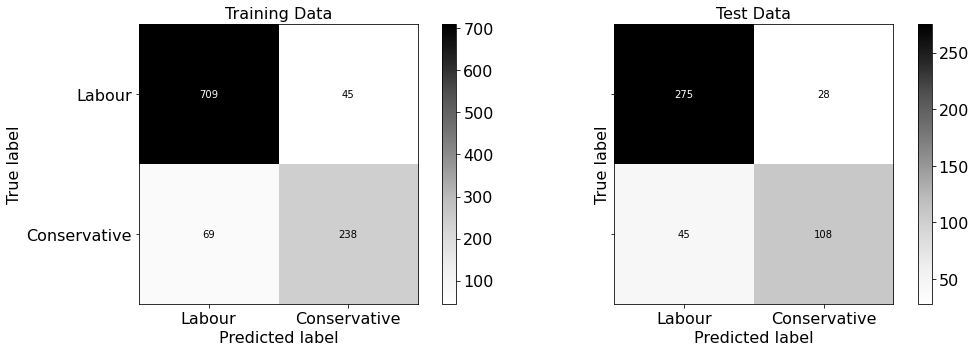

In [181]:
# Plotting confusion matrix for training and test data
confusion_matrix(best_RF)

AUC for the Training Data: 0.967
AUC for the Test Data: 0.894


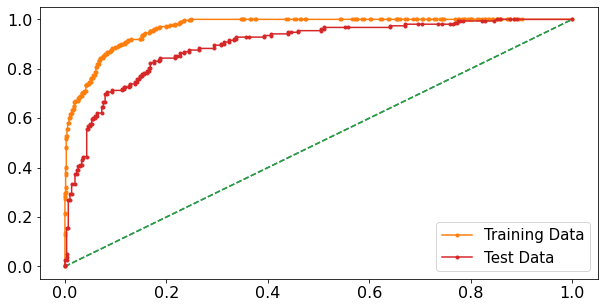

In [182]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
RF_train_auc = metrics.roc_auc_score(y_train,RF_prob_train[:,1])
print('AUC for the Training Data: %.3f' % RF_train_auc)

#  calculate roc curve
RF_train_fpr, RF_train_tpr, thresholds = metrics.roc_curve(y_train,RF_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
RF_test_auc = metrics.roc_auc_score(y_test,RF_prob_test[:,1])
print('AUC for the Test Data: %.3f' % RF_test_auc)

#  calculate roc curve
RF_test_fpr, RF_test_tpr, thresholds = metrics.roc_curve(y_test,RF_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Bagging
**Classification report for train and test set**

In [183]:
# Classification report in a dataframe
BAG_df_train=pd.DataFrame(classification_report(y_train, BAG_train_predict,output_dict=True)).transpose()
BAG_df_test=pd.DataFrame(classification_report(y_test, BAG_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

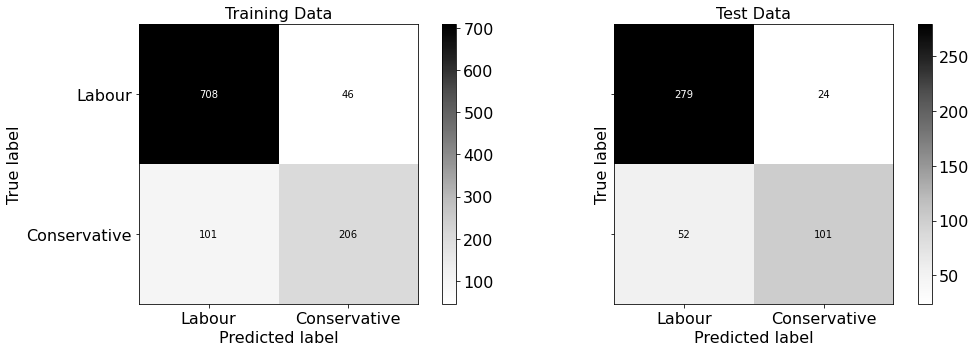

In [184]:
# Plotting confusion matrix for training and test data
confusion_matrix(best_BAG)

AUC for the Training Data: 0.922
AUC for the Test Data: 0.895


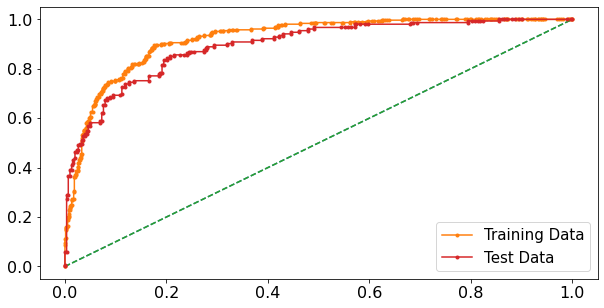

In [185]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
BAG_train_auc = metrics.roc_auc_score(y_train,BAG_prob_train[:,1])
print('AUC for the Training Data: %.3f' % BAG_train_auc)

#  calculate roc curve
BAG_train_fpr, BAG_train_tpr, thresholds = metrics.roc_curve(y_train,BAG_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BAG_train_fpr, BAG_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
BAG_test_auc = metrics.roc_auc_score(y_test,BAG_prob_test[:,1])
print('AUC for the Test Data: %.3f' % BAG_test_auc)

#  calculate roc curve
BAG_test_fpr, BAG_test_tpr, thresholds = metrics.roc_curve(y_test,BAG_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BAG_test_fpr, BAG_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Boosting
### 1. Adaptive Boosting
**Classification report for train and test set**

In [186]:
# Classification report in a dataframe
ADB_df_train=pd.DataFrame(classification_report(y_train, ADB_train_predict,output_dict=True)).transpose()
ADB_df_test=pd.DataFrame(classification_report(y_test, ADB_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

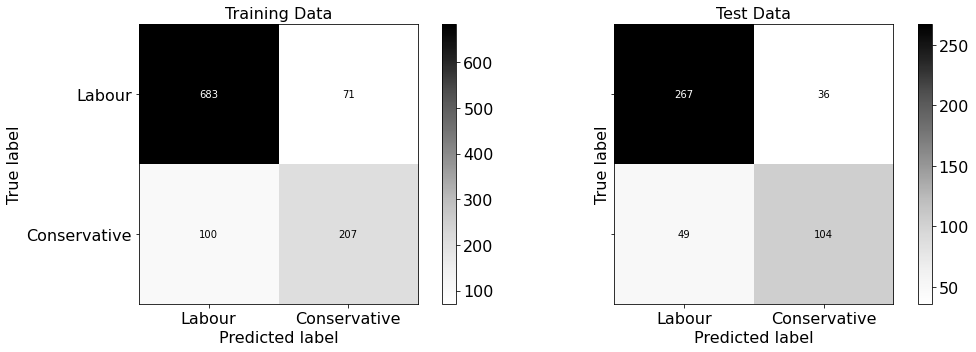

In [187]:
# Plotting confusion matrix for training and test data
confusion_matrix(ADB)

AUC for the Training Data: 0.903
AUC for the Test Data: 0.885


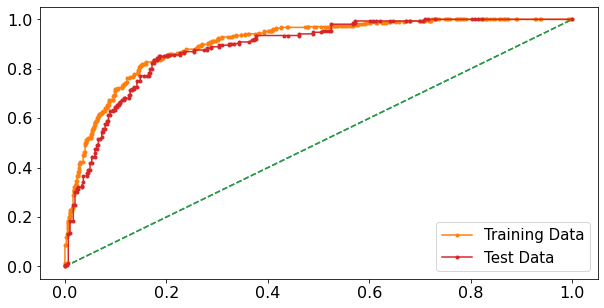

In [188]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
ADB_train_auc = metrics.roc_auc_score(y_train,ADB_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ADB_train_auc)

#  calculate roc curve
ADB_train_fpr, ADB_train_tpr, thresholds = metrics.roc_curve(y_train,ADB_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
ADB_test_auc = metrics.roc_auc_score(y_test,ADB_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ADB_test_auc)

#  calculate roc curve
ADB_test_fpr, ADB_test_tpr, thresholds = metrics.roc_curve(y_test,ADB_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 2. Gradient Boosting
**Classification report for train and test set**

In [189]:
# Classification report in a dataframe
GB_df_train=pd.DataFrame(classification_report(y_train, GB_train_predict,output_dict=True)).transpose()
GB_df_test=pd.DataFrame(classification_report(y_test, GB_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

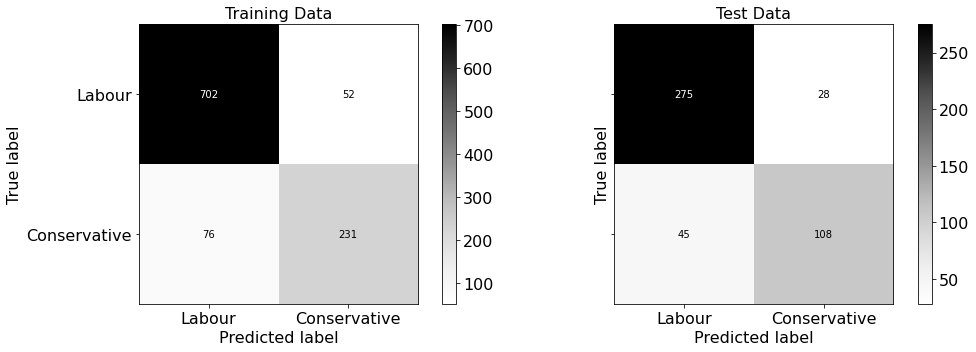

In [190]:
# Plotting confusion matrix for training and test data
confusion_matrix(GB)

AUC for the Training Data: 0.940
AUC for the Test Data: 0.901


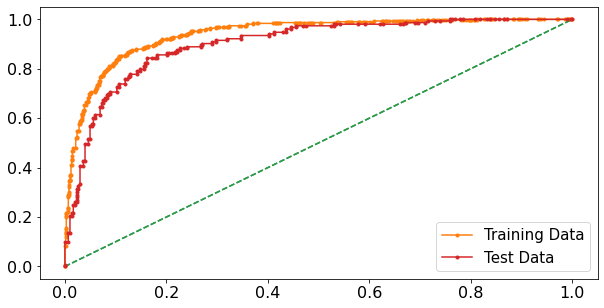

In [191]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
GB_train_auc = metrics.roc_auc_score(y_train,GB_prob_train[:,1])
print('AUC for the Training Data: %.3f' % GB_train_auc)

#  calculate roc curve
GB_train_fpr, GB_train_tpr, thresholds = metrics.roc_curve(y_train,GB_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_train_fpr, GB_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
GB_test_auc = metrics.roc_auc_score(y_test,GB_prob_test[:,1])
print('AUC for the Test Data: %.3f' % GB_test_auc)

#  calculate roc curve
GB_test_fpr, GB_test_tpr, thresholds = metrics.roc_curve(y_test,GB_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_test_fpr, GB_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 3. Extreme Gradient Boosting
**Classification report for train and test set**

In [192]:
# Classification report in a dataframe
XGB_df_train=pd.DataFrame(classification_report(y_train, XGB_train_predict,output_dict=True)).transpose()
XGB_df_test=pd.DataFrame(classification_report(y_test, XGB_test_predict,output_dict=True)).transpose()

**Confusion matrix for train and test set**

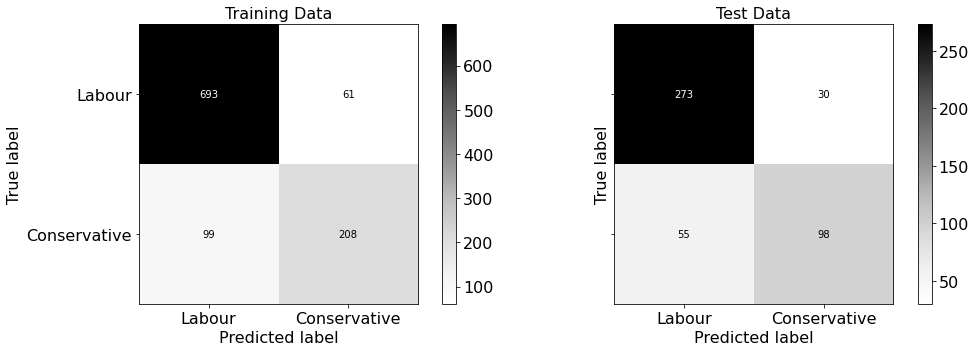

In [193]:
# Plotting confusion matrix for training and test data
confusion_matrix(XGB_random)

AUC for the Training Data: 0.902
AUC for the Test Data: 0.885


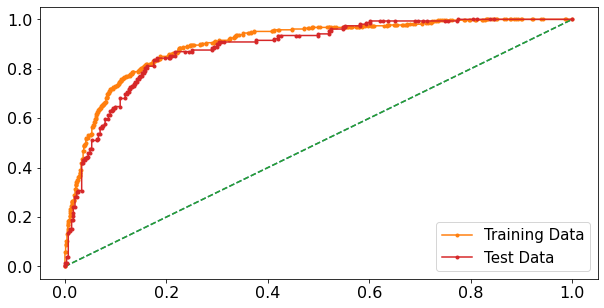

In [194]:
# AUC and ROC curve for the training data
plt.figure(figsize = (10,5))

# calculate AUC
XGB_train_auc = metrics.roc_auc_score(y_train,XGB_prob_train[:,1])
print('AUC for the Training Data: %.3f' % XGB_train_auc)

#  calculate roc curve
XGB_train_fpr, XGB_train_tpr, thresholds = metrics.roc_curve(y_train,XGB_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_train_fpr, XGB_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC curve for the test data

# calculate AUC
XGB_test_auc = metrics.roc_auc_score(y_test,XGB_prob_test[:,1])
print('AUC for the Test Data: %.3f' % XGB_test_auc)

#  calculate roc curve
XGB_test_fpr, XGB_test_tpr, thresholds = metrics.roc_curve(y_test,XGB_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_test_fpr, XGB_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Cross Validation Scores**

In [195]:
print('Train set CV scores:',cross_val_score(XGB, X_train, y_train, cv=10),'\n')
print('Test set CV scores:',cross_val_score(XGB, X_test, y_test, cv=10))

Train set CV scores: [0.82242991 0.80188679 0.82075472 0.83018868 0.87735849 0.79245283
 0.77358491 0.80188679 0.70754717 0.78301887] 

Test set CV scores: [0.76086957 0.69565217 0.84782609 0.7826087  0.80434783 0.82608696
 0.77777778 0.8        0.77777778 0.75555556]


After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

### Comparison of Models

**Important Metrics**

In [196]:
# Creating a dataframe with 'Accuracy', 'AUC', 'Recall','Precision','F1 Score' values for all models

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_df_train.loc["accuracy"][0],LR_train_auc,LR_df_train.loc["1"][1],LR_df_train.loc["1"][0],LR_df_train.loc["1"][2]],
                     'LR Test':[LR_df_test.loc["accuracy"][0],LR_test_auc,LR_df_test.loc["1"][1],LR_df_test.loc["1"][0],LR_df_test.loc["1"][2]],
                     'LDA Train':[LDA_df_train.loc["accuracy"][0],LDA_train_auc,LDA_df_train.loc["1"][1],LDA_df_train.loc["1"][0],LDA_df_train.loc["1"][2]],
                     'LDA Test':[LDA_df_test.loc["accuracy"][0],LDA_test_auc,LDA_df_test.loc["1"][1],LDA_df_test.loc["1"][0],LDA_df_test.loc["1"][2]],
                     'KNN Train':[KNN_df_train.loc["accuracy"][0],KNN_train_auc,KNN_df_train.loc["1"][1],KNN_df_train.loc["1"][0],KNN_df_train.loc["1"][2]],
                     'KNN Test':[KNN_df_test.loc["accuracy"][0],KNN_test_auc,KNN_df_test.loc["1"][1],KNN_df_test.loc["1"][0],KNN_df_test.loc["1"][2]],
                     'NB Train':[NB_df_train.loc["accuracy"][0],NB_train_auc,NB_df_train.loc["1"][1],NB_df_train.loc["1"][0],NB_df_train.loc["1"][2]],
                     'NB Test':[NB_df_test.loc["accuracy"][0],NB_test_auc,NB_df_test.loc["1"][1],NB_df_test.loc["1"][0],NB_df_test.loc["1"][2]],
                     'DT Train':[DT_df_train.loc["accuracy"][0],DT_train_auc,DT_df_train.loc["1"][1],DT_df_train.loc["1"][0],DT_df_train.loc["1"][2]],
                     'DT Test':[DT_df_test.loc["accuracy"][0],DT_test_auc,DT_df_test.loc["1"][1],DT_df_test.loc["1"][0],DT_df_test.loc["1"][2]],
                     'BAG Train':[BAG_df_train.loc["accuracy"][0],BAG_train_auc,BAG_df_train.loc["1"][1],BAG_df_train.loc["1"][0],BAG_df_train.loc["1"][2]],
                     'BAG Test':[BAG_df_test.loc["accuracy"][0],BAG_test_auc,BAG_df_test.loc["1"][1],BAG_df_test.loc["1"][0],BAG_df_test.loc["1"][2]],
                     'RF Train':[RF_df_train.loc["accuracy"][0],RF_train_auc,RF_df_train.loc["1"][1],RF_df_train.loc["1"][0],RF_df_train.loc["1"][2]],
                     'RF Test':[RF_df_test.loc["accuracy"][0],RF_test_auc,RF_df_test.loc["1"][1],RF_df_test.loc["1"][0],RF_df_test.loc["1"][2]],
                     'ADB Train':[ADB_df_train.loc["accuracy"][0],ADB_train_auc,ADB_df_train.loc["1"][1],ADB_df_train.loc["1"][0],ADB_df_train.loc["1"][2]],
                     'ADB Test':[ADB_df_test.loc["accuracy"][0],ADB_test_auc,ADB_df_test.loc["1"][1],ADB_df_test.loc["1"][0],ADB_df_test.loc["1"][2]],
                     'GB Train':[GB_df_train.loc["accuracy"][0],GB_train_auc,GB_df_train.loc["1"][1],GB_df_train.loc["1"][0],GB_df_train.loc["1"][2]],
                     'GB Test':[GB_df_test.loc["accuracy"][0],GB_test_auc,GB_df_test.loc["1"][1],GB_df_test.loc["1"][0],GB_df_test.loc["1"][2]],
                     'XGB Train':[XGB_df_train.loc["accuracy"][0],XGB_train_auc,XGB_df_train.loc["1"][1],XGB_df_train.loc["1"][0],XGB_df_train.loc["1"][2]],
                     'XGB Test':[XGB_df_test.loc["accuracy"][0],XGB_test_auc,XGB_df_test.loc["1"][1],XGB_df_test.loc["1"][0],XGB_df_test.loc["1"][2]]},
                    index=index)
data = round(data,3)

In [197]:
# All together
data

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,DT Train,DT Test,BAG Train,BAG Test,RF Train,RF Test,ADB Train,ADB Test,GB Train,GB Test,XGB Train,XGB Test
Accuracy,0.830,0.829,0.831,0.833,0.855,0.836,0.838,0.822,0.844,0.820,0.861,0.833,0.893,0.840,0.839,0.814,0.879,0.840,0.849,0.814
AUC,0.889,0.883,0.888,0.887,0.921,0.890,0.887,0.877,0.908,0.855,0.922,0.895,0.967,0.894,0.903,0.885,0.940,0.901,0.902,0.885
Recall,0.635,0.725,0.645,0.732,0.694,0.699,0.684,0.745,0.707,0.693,0.671,0.660,0.775,0.706,0.674,0.680,0.752,0.706,0.678,0.641
Precision,0.741,0.755,0.739,0.762,0.780,0.787,0.737,0.731,0.741,0.752,0.817,0.808,0.841,0.794,0.745,0.743,0.816,0.794,0.773,0.766
F1 Score,0.684,0.740,0.689,0.747,0.734,0.740,0.709,0.738,0.723,0.721,0.737,0.727,0.807,0.747,0.708,0.710,0.783,0.747,0.722,0.698


In [198]:
# All train sets
data.iloc[:,[0,2,4,6,8,10,12,14,16,18]]

,LR Train,LDA Train,KNN Train,NB Train,DT Train,BAG Train,RF Train,ADB Train,GB Train,XGB Train
Accuracy,0.830,0.831,0.855,0.838,0.844,0.861,0.893,0.839,0.879,0.849
AUC,0.889,0.888,0.921,0.887,0.908,0.922,0.967,0.903,0.940,0.902
Recall,0.635,0.645,0.694,0.684,0.707,0.671,0.775,0.674,0.752,0.678
Precision,0.741,0.739,0.780,0.737,0.741,0.817,0.841,0.745,0.816,0.773
F1 Score,0.684,0.689,0.734,0.709,0.723,0.737,0.807,0.708,0.783,0.722


In [199]:
# All test sets
data.iloc[:,[1,3,5,7,9,11,13,15,17,19]]

,LR Test,LDA Test,KNN Test,NB Test,DT Test,BAG Test,RF Test,ADB Test,GB Test,XGB Test
Accuracy,0.829,0.833,0.836,0.822,0.820,0.833,0.840,0.814,0.840,0.814
AUC,0.883,0.887,0.890,0.877,0.855,0.895,0.894,0.885,0.901,0.885
Recall,0.725,0.732,0.699,0.745,0.693,0.660,0.706,0.680,0.706,0.641
Precision,0.755,0.762,0.787,0.731,0.752,0.808,0.794,0.743,0.794,0.766
F1 Score,0.740,0.747,0.740,0.738,0.721,0.727,0.747,0.710,0.747,0.698


**ROC Curve for train and test data**

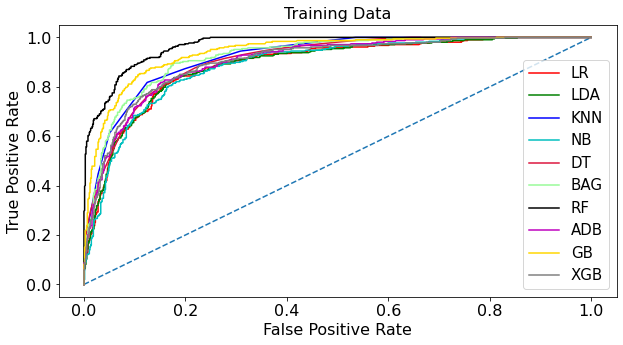

In [200]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_train_fpr, LR_train_tpr,color='r',label="LR")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='g',label="LDA")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='b',label="KNN")
plt.plot(NB_train_fpr,NB_train_tpr,color='c',label="NB")
plt.plot(DT_train_fpr,DT_train_tpr,color='crimson',label="DT")
plt.plot(BAG_train_fpr,BAG_train_tpr,color='palegreen',label="BAG")
plt.plot(RF_train_fpr,RF_train_tpr,color='black',label="RF")
plt.plot(ADB_train_fpr,ADB_train_tpr,color='m',label="ADB")
plt.plot(GB_train_fpr,GB_train_tpr,color='gold',label="GB")
plt.plot(XGB_train_fpr,XGB_train_tpr,color='gray',label="XGB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data')
plt.legend(loc=0)

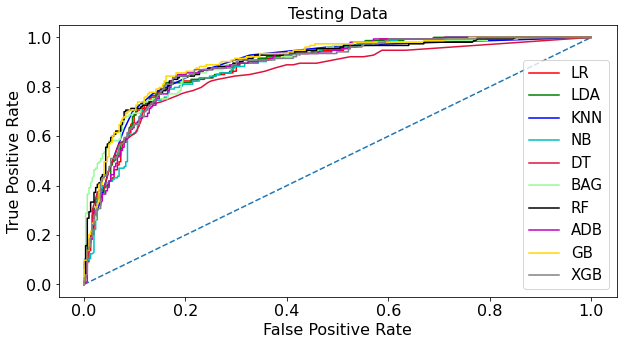

In [201]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_test_fpr, LR_test_tpr,color='r',label="LR")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='g',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='b',label="KNN")
plt.plot(NB_test_fpr,NB_test_tpr,color='c',label="NB")
plt.plot(DT_test_fpr,DT_test_tpr,color='crimson',label="DT")
plt.plot(BAG_test_fpr,BAG_test_tpr,color='palegreen',label="BAG")
plt.plot(RF_test_fpr,RF_test_tpr,color='black',label="RF")
plt.plot(ADB_test_fpr,ADB_test_tpr,color='m',label="ADB")
plt.plot(GB_test_fpr,GB_test_tpr,color='gold',label="GB")
plt.plot(XGB_test_fpr,XGB_test_tpr,color='gray',label="XGB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Data')
plt.legend(loc=0)

In [202]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn import tree
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display
# graph = Source(tree.export_graphviz(DT, out_file=None, feature_names=news.columns[1:9], 
#                                     class_names=['Labour', 'Conservative'], filled = True))
# display(SVG(graph.pipe(format='svg')))

# from sklearn import tree

# train_char_label = ['Labour', 'Conservative']
# ld_Tree_File = open('Claimed_new.dot','w')
# dot_data = tree.export_graphviz(DT1, 
#                                 out_file=ld_Tree_File, 
#                                 feature_names = list(X_train), 
#                                 class_names = list(train_char_label))

# ld_Tree_File.close()

## 1.8) Based on these predictions, what are the insights?

In [203]:
def feature_importance(model):
    x=pd.DataFrame(model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
    plt.figure(figsize=(12,7))
    sns.barplot(x[0],x.index,palette='rainbow')
    plt.ylabel('Feature Name')
    plt.xlabel('Feature Importance in %')
    plt.title('Feature Importance Plot')
    plt.show()

### Feature Importances as per Decision Tree

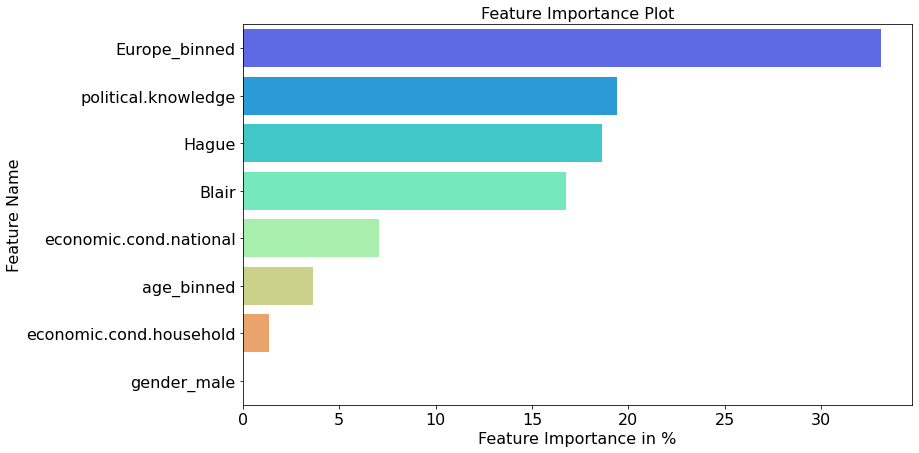

In [204]:
feature_importance(best_DT)

### Feature Importances as per Random Forest

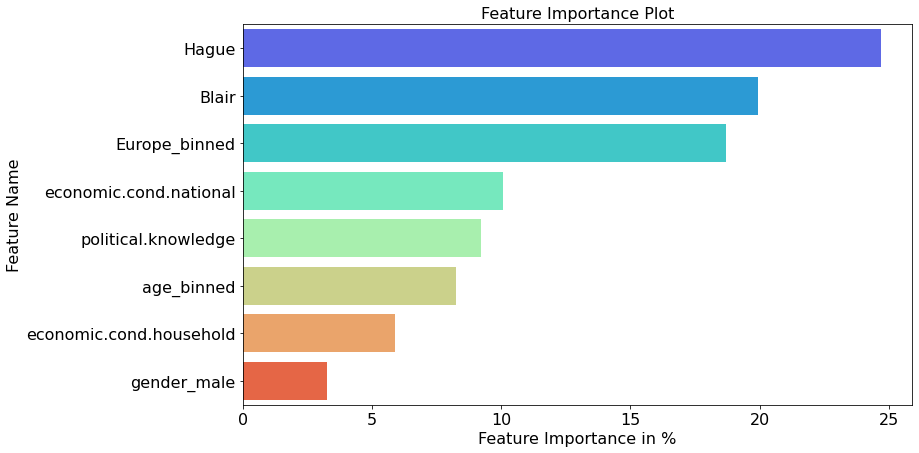

In [205]:
feature_importance(best_RF)

### Feature Importances as per LGBMClassifier

In [206]:
import lightgbm as lgb
lgb_classfr = lgb.LGBMClassifier(objective='binary', 
         boosting_type = 'gbdt', 
         n_estimators = 10000)
lgb_classfr.fit(X_train, y_train, early_stopping_rounds=200, verbose = 200, eval_set = [(X_test, y_test)])

Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.513933
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.377937


LGBMClassifier(n_estimators=10000, objective='binary')

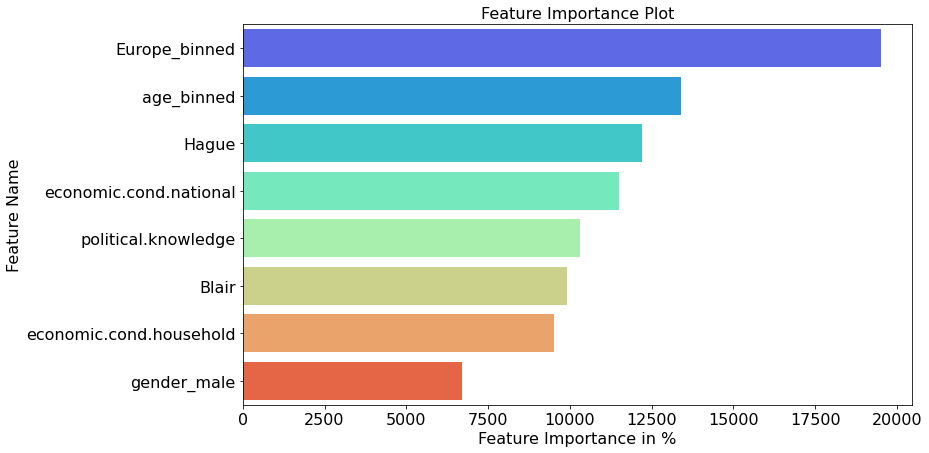

In [207]:
feature_importance(lgb_classfr)

# Problem 2

In [208]:
import nltk
import re
import string
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS

In [209]:
# Storing their speeches in Dictionary with keys having their respective names
president_dict = {'Roosevelt': inaugural.raw('1941-Roosevelt.txt'), 'Kennedy': inaugural.raw('1961-Kennedy.txt'), 'Nixon': inaugural.raw('1973-Nixon.txt')}

## 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

### Number of characters, words and sentences before cleaning data

### Number of characters

In [210]:
# Counting number of characters using .len() method before cleaning text
for president in president_dict:
    print("Number of characters in {}'s speech before cleaning data using .len() method: {}".format(president,len(president_dict[president])))

Number of characters in Roosevelt's speech before cleaning data using .len() method: 7571
Number of characters in Kennedy's speech before cleaning data using .len() method: 7618
Number of characters in Nixon's speech before cleaning data using .len() method: 9991


### Number of Words

In [211]:
inaugural.words('1941-Roosevelt.txt')[:30]

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'",
 's',
 'day',
 'the',
 'task',
 'of']

We can see that the .words() method considers special characters like ".", "'", "," etc as separate words too.

In [212]:
# Counting the number of words using .words() method before cleaning text
speech_name = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
President_name = ['Roosevelt','Kennedy','Nixon']
for name,speech in zip(President_name,speech_name):
    print("Number of words in {}'s speech before cleaning data using .words() method: {}".format(name,len(inaugural.words(speech))))

Number of words in Roosevelt's speech before cleaning data using .words() method: 1536
Number of words in Kennedy's speech before cleaning data using .words() method: 1546
Number of words in Nixon's speech before cleaning data using .words() method: 2028


If we use the .split() method, it provides a more reliable count as it doesn't consider special characters like separate words instead it separates words using spaces between them 

In [213]:
inaugural.raw('1941-Roosevelt.txt').split()[:20]

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789,',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States.']

In [214]:
# Counting the number of words using .split() method before cleaning text
for president in president_dict:
    print("Number of words in {}'s speech before cleaning data using .split() method: {}".format(president,len(president_dict[president].split())))

Number of words in Roosevelt's speech before cleaning data using .split() method: 1360
Number of words in Kennedy's speech before cleaning data using .split() method: 1390
Number of words in Nixon's speech before cleaning data using .split() method: 1819


### Number of Sentences

In [215]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

It uses characters like ".", "?" to separate the sentences. If we remove the special characters during data cleaning then it will not be possible to know the number of sentences in the paragraph hence this will be considered as final sentence count.

In [216]:
for name,speech in zip(President_name,speech_name):
    print("Number of sentences in {}'s speech before cleaning data using .sents() method: {}".format(name,len(inaugural.sents(speech))))

Number of sentences in Roosevelt's speech before cleaning data using .sents() method: 68
Number of sentences in Kennedy's speech before cleaning data using .sents() method: 52
Number of sentences in Nixon's speech before cleaning data using .sents() method: 69


## Text Preprocessing

### Converting to lower case and removing punctuations and special characters

In [217]:
# Function to convert text to lower case and remove punctuations and special characters
def clean_text(text):
    text = text.lower() # Converting text to lower case
    text = re.sub('[^\w\s]','',text) # removing punctuations
    return text

In [218]:
# Performed above cleaning to all the 3 speeches present in dictionary
for president in president_dict:
    president_dict[president] = clean_text(president_dict[president])

### Number of characters, words and sentences after cleaning data

### 1. Number of characters

In [219]:
# Counting number of characters using .len() method after cleaning text
for president in president_dict:
    print("Number of characters in {}'s speech before cleaning data using .len() method: {}".format(president,len(president_dict[president])))

Number of characters in Roosevelt's speech before cleaning data using .len() method: 7359
Number of characters in Kennedy's speech before cleaning data using .len() method: 7414
Number of characters in Nixon's speech before cleaning data using .len() method: 9764


### Number of Words

In [220]:
# Counting the number of words using .split() method after cleaning text
for president in president_dict:
    print("Number of words in {}'s speech before cleaning data using .split() method: {}".format(president,len(president_dict[president].split())))

Number of words in Roosevelt's speech before cleaning data using .split() method: 1338
Number of words in Kennedy's speech before cleaning data using .split() method: 1365
Number of words in Nixon's speech before cleaning data using .split() method: 1802


## 2.2) Remove all the stopwords from the three speeches.

In [221]:
# List of stopswords from NLTK corpus
stop = stopwords.words('english')

In [222]:
# Function to remove stopwords
def remove_stopwords(text):
    text = " ".join(text for text in text.split() if text not in stop)
    return text

In [223]:
# Removing stopwords of all the 3 speeches present in dictionary using above function
for president in president_dict:
    president_dict[president] = remove_stopwords(president_dict[president])

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [224]:
# Top 10 words of Roosevelt
Roosevelt_freq = pd.Series(president_dict['Roosevelt'].split())
Roosevelt_freq.value_counts()[:10]

nation       11
know         10
democracy     9
spirit        9
life          8
us            8
people        7
america       7
years         6
freedom       6
dtype: int64

In [225]:
# Top 10 words of Kennedy
Kennedy_freq = pd.Series(president_dict['Kennedy'].split())
Kennedy_freq.value_counts()[:10]

let         16
us          12
sides        8
world        8
pledge       7
new          7
shall        5
citizens     5
ask          5
nations      5
dtype: int64

In [226]:
# Top 10 words of Nixon
Nixon_freq = pd.Series(president_dict['Nixon'].split())
Nixon_freq.value_counts()[:10]

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
great              9
home               9
dtype: int64

From the above list we can see that words like let, us, know are not only common but don't provide any useful information, so will append these words in our stopwords list.

In [227]:
stop.extend(['let','us','know'])

In [228]:
# Removing stopwords of all the 3 speeches present in dictionary using updated list of stopwords
for president in president_dict:
    president_dict[president] = remove_stopwords(president_dict[president])

In [229]:
# Top 10 words of Roosevelt
Roosevelt_freq = pd.Series(president_dict['Roosevelt'].split())
Roosevelt_freq.value_counts()[:10]

nation       11
spirit        9
democracy     9
life          8
america       7
people        7
years         6
freedom       6
human         5
mind          5
dtype: int64

In [230]:
# Top 10 words of Kennedy
Kennedy_freq = pd.Series(president_dict['Kennedy'].split())
Kennedy_freq.value_counts()[:10]

sides       8
world       8
pledge      7
new         7
free        5
ask         5
shall       5
nations     5
power       5
citizens    5
dtype: int64

In [231]:
# Top 10 words of Nixon
Nixon_freq = pd.Series(president_dict['Nixon'].split())
Nixon_freq.value_counts()[:10]

peace             19
world             16
new               15
america           13
responsibility    11
government        10
great              9
home               9
abroad             8
americas           8
dtype: int64

### 3. Stemming 

In [232]:
president_dict_stem = president_dict.copy()

In [233]:
# Function for stemming
st = PorterStemmer()
def stemming(text):
    text = " ".join([st.stem(word) for word in text.split()])
    return text

In [234]:
# Stemming words for all the 3 speeches and store them in a new dictionary
for president in president_dict_stem:
    president_dict_stem[president] = stemming(president_dict_stem[president])

In [235]:
# Top 10 words of Roosevelt
Roosevelt_freq = pd.Series(president_dict_stem['Roosevelt'].split())
Roosevelt_freq.value_counts()[:10]

nation       17
life          9
peopl         9
democraci     9
spirit        9
america       8
live          7
year          7
human         6
freedom       6
dtype: int64

In [236]:
# Top 10 words of Kennedy
Kennedy_freq = pd.Series(president_dict_stem['Kennedy'].split())
Kennedy_freq.value_counts()[:10]

power     9
side      8
nation    8
world     8
new       7
pledg     7
ask       6
shall     5
free      5
peac      5
dtype: int64

In [237]:
# Top 10 words of Nixon
Nixon_freq = pd.Series(president_dict_stem['Nixon'].split())
Nixon_freq.value_counts()[:10]

america    21
peac       19
world      18
respons    17
nation     15
new        15
govern     10
great       9
year        9
home        9
dtype: int64

## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

### Roosevelt

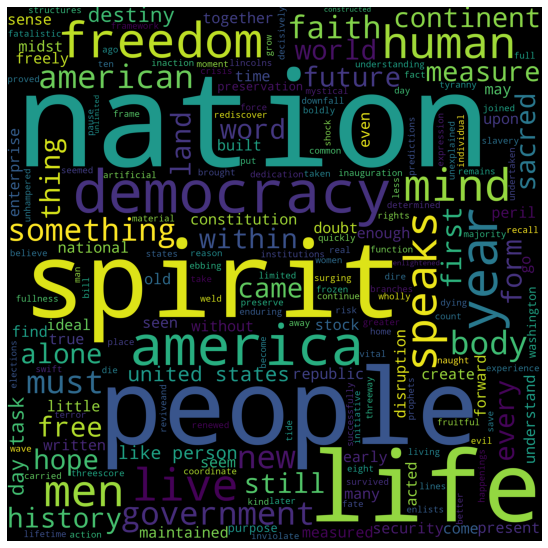

In [238]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(president_dict['Roosevelt']) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()

### Kennedy

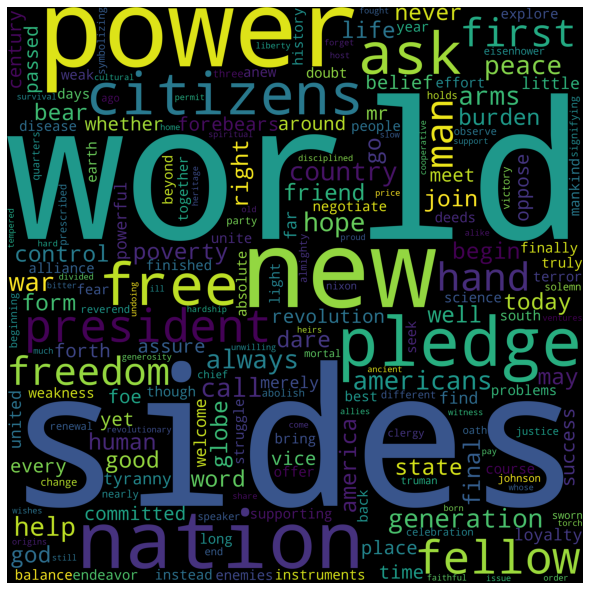

In [239]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(president_dict['Kennedy']) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

### Nixon

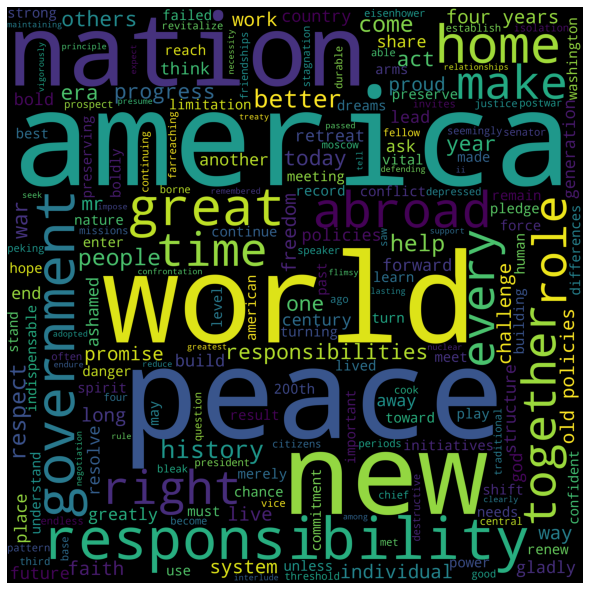

In [240]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(president_dict['Nixon']) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()